# Assessment 1: Group 6


**Group Members:**

> Abrigo, Nathanael\
> Buhay, Kyle Andrei\
> Cruz, Kristel Lenci\
> Entrata, Joshua Kyle


In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pycountry
import pycountry_convert as pc
import plotly.express as px

In [61]:
# This can help us see all the columns when checking the dataframe
pd.set_option('display.max_columns', None)

## `Part 1: Data Wrangling`


### **Data Cleaning**


#### Loading Datasets


In [3]:
# Load FAO dataset
df_fao = pd.read_csv('FAO.csv', encoding='iso-8859-1')

# Load FAOSTAT dataset
df_faostat = pd.read_csv('FAOSTAT.csv')

In [4]:
df_fao.sample(3)

Area Abbreviation  Area Code                 Area  Item Code  \
7864                GRC         84               Greece       2617   
555                 ATG          8  Antigua and Barbuda       2928   
16417               LCA        189          Saint Lucia       2533   

                      Item  Element Code Element         Unit  latitude  \
7864   Apples and products          5142    Food  1000 tonnes     39.07   
555          Miscellaneous          5142    Food  1000 tonnes     17.06   
16417       Sweet potatoes          5142    Food  1000 tonnes     13.91   

       longitude  Y1961  Y1962  Y1963  Y1964  Y1965  Y1966  Y1967  Y1968  \
7864       21.82  145.0  140.0  129.0  178.0  114.0  162.0  183.0  189.0   
555       -61.80    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16417     -60.98    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

       Y1969  Y1970  Y1971  Y1972  Y1973  Y1974  Y1975  Y1976  Y1977  Y1978  \
7864   177.0  178.0  161.0  124.0  175.0  132.0  138.0  111.0  101.0   91.0   
555      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16417    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

       Y1979  Y1980  Y1981  Y1982  Y1983  Y1984  Y1985  Y1986  Y1987  Y1988  \
7864   120.0  136.0  178.0  112.0  187.0  149.0  111.0   89.0  127.0  173.0   
555      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16417    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

       Y1989  Y1990  Y1991  Y1992  Y1993  Y1994  Y1995  Y1996  Y1997  Y1998  \
7864   183.0  246.0  147.0  288.0  221.0  246.0  196.0  191.0  220.0  218.0   
555      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16417    1.0    1.0    1.0    1.0    1.0    1.0    0.0    0.0    1.0    0.0   

       Y1999  Y2000  Y2001  Y2002  Y2003  Y2004  Y2005  Y2006  Y2007  Y2008  \
7864   223.0  201.0  180.0  169.0  165.0  254.0  208.0  199.0  165.0  104.0   
555      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16417    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0   

       Y2009  Y2010  Y2011  Y2012  Y2013  
7864   130.0   55.0   62.0     83     64  
555      0.0    0.0    0.0      0      0  
16417    0.0    0.0    0.0      1      1

In [5]:
df_faostat.sample(3)

Domain Code             Domain  Area Code  \
124          OA  Annual population        132   
176          OA  Annual population        191   
75           OA  Annual population         70   

                                 Area  Element Code  \
124                          Maldives           511   
176  Saint Vincent and the Grenadines           511   
75                   French Polynesia           511   

                           Element  Item Code                       Item  \
124  Total Population - Both sexes       3010  Population - Est. & Proj.   
176  Total Population - Both sexes       3010  Population - Est. & Proj.   
75   Total Population - Both sexes       3010  Population - Est. & Proj.   

     Year Code  Year          Unit    Value Flag  \
124       2017  2017  1000 persons  436.330    X   
176       2017  2017  1000 persons  109.897    X   
75        2017  2017  1000 persons  283.007    X   

                   Flag Description  \
124  International reliable sources   
176  International reliable sources   
75   International reliable sources   

                                                  Note  
124  UNDESA, Population Division – World Population...  
176  UNDESA, Population Division – World Population...  
75   UNDESA, Population Division – World Population...

#### Data Dictionary


In [6]:
def generate_data_dictionary(df, desc_list):
    data_dict = {
        'Column Name': [],
        'Data Type': [],
        'Description': []
    }
    
    for i, column in enumerate(df.columns):
        data_dict['Column Name'].append(column)
        data_dict['Data Type'].append(df[column].dtype)
        
        # Provide a description based on the description list or a default value
        description = desc_list[i] if i < len(desc_list) else 'N/A'
        
        # If the column name starts with 'Y' and is a year, format accordingly
        if column.startswith('Y') and column[1:].isdigit():
            description = f'Data for the year {column[1:]}'
        data_dict['Description'].append(description)
    
    return pd.DataFrame(data_dict)

`FAO Dataset`


In [7]:
fao_description_list = [
    "Abbreviation of Area",
    "Full name of the country or region",
    "ISO country code or region abbreviation",
    "Numeric code for the country or region",
    "Numeric code for the item",
    "Name of the item",
    "Numeric code for the element",
    "Type of data recorded",
    "Measurement unit for the recorded data",
    "Latitude coordinate of the location",
    "Longitude coordinate of the location",
]

In [8]:
# Generate data dictionary for FAO
fao_data_dict = generate_data_dictionary(df_fao, fao_description_list)
fao_data_dict

Column Name Data Type                              Description
0   Area Abbreviation    object                     Abbreviation of Area
1           Area Code     int64       Full name of the country or region
2                Area    object  ISO country code or region abbreviation
3           Item Code     int64   Numeric code for the country or region
4                Item    object                Numeric code for the item
..                ...       ...                                      ...
58              Y2009   float64                   Data for the year 2009
59              Y2010   float64                   Data for the year 2010
60              Y2011   float64                   Data for the year 2011
61              Y2012     int64                   Data for the year 2012
62              Y2013     int64                   Data for the year 2013

[63 rows x 3 columns]

`FAOSTAT Dataset`


In [9]:
faostat_description_list=[
    "Numeric Code for Domain",
    "Population Type",
    "Numeric code for the country or region",
    "Full name of the country or region",
    "Numeric code for the element",
    "Element Type",
    "Numeric code for the item",
    "Object of focus",
    "Code for the Year",
    "Time of the Year",
    "Quantity of item",
    "Value of the item",
    "Flag",
    "Sources of item",
    "Note for item",
]

In [10]:
# Generate data dictionary for FAOSTAT
faostat_data_dict = generate_data_dictionary(df_faostat, faostat_description_list)
faostat_data_dict

Column Name Data Type                             Description
0        Domain Code    object                 Numeric Code for Domain
1             Domain    object                         Population Type
2          Area Code     int64  Numeric code for the country or region
3               Area    object      Full name of the country or region
4       Element Code     int64            Numeric code for the element
5            Element    object                            Element Type
6          Item Code     int64               Numeric code for the item
7               Item    object                         Object of focus
8          Year Code     int64                       Code for the Year
9               Year     int64                        Time of the Year
10              Unit    object                        Quantity of item
11             Value   float64                       Value of the item
12              Flag    object                                    Flag
13  Flag Description    object                         Sources of item
14              Note    object                           Note for item

#### Handling Missing Values


In [11]:
# Check rows with null value per column
fao_null_values = {col: df_fao[col].isnull().sum() for col in df_fao.columns if df_fao[col].isnull().sum() > 0}

fao_null_values

{'Y1961': 3539,
 'Y1962': 3539,
 'Y1963': 3539,
 'Y1964': 3539,
 'Y1965': 3539,
 'Y1966': 3539,
 'Y1967': 3539,
 'Y1968': 3539,
 'Y1969': 3539,
 'Y1970': 3539,
 'Y1971': 3539,
 'Y1972': 3539,
 'Y1973': 3539,
 'Y1974': 3539,
 'Y1975': 3539,
 'Y1976': 3539,
 'Y1977': 3539,
 'Y1978': 3539,
 'Y1979': 3539,
 'Y1980': 3539,
 'Y1981': 3539,
 'Y1982': 3539,
 'Y1983': 3539,
 'Y1984': 3539,
 'Y1985': 3539,
 'Y1986': 3539,
 'Y1987': 3539,
 'Y1988': 3539,
 'Y1989': 3539,
 'Y1990': 3415,
 'Y1991': 3415,
 'Y1992': 987,
 'Y1993': 612,
 'Y1994': 612,
 'Y1995': 612,
 'Y1996': 612,
 'Y1997': 612,
 'Y1998': 612,
 'Y1999': 612,
 'Y2000': 349,
 'Y2001': 349,
 'Y2002': 349,
 'Y2003': 349,
 'Y2004': 349,
 'Y2005': 349,
 'Y2006': 104,
 'Y2007': 104,
 'Y2008': 104,
 'Y2009': 104,
 'Y2010': 104,
 'Y2011': 104}

In [12]:
null_cols = df_fao.isnull().sum()
null_cols[null_cols > 0].index

Index(['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968',
       'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976',
       'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984',
       'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992',
       'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000',
       'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008',
       'Y2009', 'Y2010', 'Y2011'],
      dtype='object')

In [13]:
print(f'Number of rows with null values: {len(df_fao[df_fao.isnull().any(axis=1)])}')

Number of rows with null values: 3539


In [14]:
faostat_null_values = {col: df_faostat[col].isnull().sum() for col in df_faostat.columns if df_faostat[col].isnull().sum() > 0}

faostat_null_values

{}

**Explanation & Justification:**

> We handled missing data in the `FAO` and `FAOSTAT` dataset specifically for the years 1961 - 1991 by retaining the null values rather than replacing them with -1. Since the "y{YEAR_NUM}" columns are the only ones with null values, it is acceptable to leave these nulls as they are. Replacing these nulls with -1 could affect the summarization of statistics and affect the accuracy of visualizations.

> Retaining null values preserves the integrity of our statistical summaries, such as mean and standard deviation calculations, which could be skewed by arbitrary replacement values like -1. By keeping nulls, we avoid misrepresenting missing data as zeroes, thus ensuring that our plots and analyses accurately reflect the data's true nature and maintain clarity in our visualizations.


#### Removing & Checking Duplicates


In [15]:
# Check duplicates in FAO
dupe_fao_sum= df_fao.duplicated().sum()

print(f'Total number of duplicated rows in FAO: {dupe_fao_sum}')

Total number of duplicated rows in FAO: 0


In [16]:
# Check duplicates in FAOSTAT
dupe_faostat_sum = df_faostat.duplicated().sum()

print(f'Total number of duplicated rows in FAOSTAT: {dupe_faostat_sum}')

Total number of duplicated rows in FAOSTAT: 0


**Explanation & Justification:**

> To remove and check duplicates in both the `FAO` and `FAOSTAT` datasets, the _duplicated_ Pandas method is utilized.

> By default, the _duplicated_ Pandas method returns a boolean series that denotes duplicate rows. To have a numerical representation of the number of duplicates, we added the _sum_ Pandas method, that denotes its total instead.


#### Standardize Column Names


In [17]:
df_fao.columns = (
    df_fao.columns
    .str.lower()                                 # Convert to lowercase
    .str.replace(' ', '_')                       # Replace spaces with underscores
    .str.replace(r'[^a-z0-9_]', '', regex=True)  # Remove special characters
)

In [18]:
df_faostat.columns = (
    df_faostat.columns
    .str.lower()                
    .str.replace(' ', '_')      
    .str.replace(r'[^a-z0-9_]', '', regex=True)  
)

**Explanation & Justification:**

> To standardize the column names of the `FAO` and `FAOSTAT` datasets, we first converted the column names to lowercase and replaced any spaces with underscores. This ensures consistency in case and format, helping to avoid potential issues related to case sensitivity.

> Additionally, we removed any special characters from the column names, leaving only lowercase letters, numbers, and underscores.

> These standardization steps enhance data consistency, making the datasets easier to work with and reducing the likelihood of errors during data processing.


In [19]:
# Rename similar columns in the dataframe
df_faostat.rename(columns={
    'item'        : 'population_item',
    'item_code'   : 'population_item_code',
    'element'     : 'population_element',
    'element_code': 'population_element_code',
    'unit'        : 'population_unit'
}, inplace=True)

df_faostat.columns

Index(['domain_code', 'domain', 'area_code', 'area', 'population_element_code',
       'population_element', 'population_item_code', 'population_item',
       'year_code', 'year', 'population_unit', 'value', 'flag',
       'flag_description', 'note'],
      dtype='object')

**Explanation & Justification:**

> The `FAO` and `FAOSTAT` datasets share similar column names and merging them could lead to confusion or errors. Thus, we renamed such columns to ensure clarity and avoid potential conflicts during analysis.

> We renamed specific columns in the `FAOSTAT` dataset to make them more descriptive and aligned with the dataset's focus on population data. The columns renamed include:
>
> - 'item' to 'population_item': This clarifies that the column refers specifically to the population data item (e.g., "Population - Estimated and Projected").
> - 'item_code' to 'population_item_code': By adding "population," it specifies that the code is related to population items.
> - 'element' to 'population_element': This indicates that the column pertains to a specific element within the population data (e.g., "Total Population - Both sexes").
> - 'element_code' to 'population_element_code': This specifies that the code relates to population elements (e.g., "511").
> - 'unit' to 'population_unit': This clearly shows that the column represents the unit of measurement for the population data (e.g., "1000 persons").


### **Data Merging**


In [20]:
df_fao.merge(
    df_faostat, 
    how='inner', 
    on=['area_code', 'area']
).sample(3)

area_abbreviation  area_code                 area  item_code  \
4829               CIV        107        Côte d'Ivoire       2577   
511                ATG          8  Antigua and Barbuda       2736   
7197               GAB         74                Gabon       2551   

                   item  element_code element         unit  latitude  \
4829           Palm Oil          5142    Food  1000 tonnes      7.54   
511      Offals, Edible          5142    Food  1000 tonnes     17.06   
7197  Nuts and products          5142    Food  1000 tonnes     -0.80   

      longitude  y1961  y1962  y1963  y1964  y1965  y1966  y1967  y1968  \
4829      -5.55   13.0   14.0   13.0   13.0   15.0   16.0   17.0   20.0   
511      -61.80    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7197      11.61    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      y1969  y1970  y1971  y1972  y1973  y1974  y1975  y1976  y1977  y1978  \
4829   25.0   28.0   28.0   32.0   35.0   40.0   42.0   45.0   55.0   61.0   
511     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7197    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      y1979  y1980  y1981  y1982  y1983  y1984  y1985  y1986  y1987  y1988  \
4829   63.0   67.0   81.0   83.0   87.0  105.0  106.0  108.0   83.0   81.0   
511     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7197    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      y1989  y1990  y1991  y1992  y1993  y1994  y1995  y1996  y1997  y1998  \
4829   95.0  105.0  107.0  107.0  100.0  125.0  128.0  157.0  166.0  149.0   
511     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7197    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      y1999  y2000  y2001  y2002  y2003  y2004  y2005  y2006  y2007  y2008  \
4829  157.0  159.0  161.0  163.0  175.0  178.0  180.0  180.0  183.0  173.0   
511     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7197    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      y2009  y2010  y2011  y2012  y2013 domain_code             domain  \
4829  163.0  161.0  172.0    176    182          OA  Annual population   
511     0.0    0.0    0.0      0      0          OA  Annual population   
7197    0.0    0.0    0.0      0      0          OA  Annual population   

      population_element_code             population_element  \
4829                      511  Total Population - Both sexes   
511                       511  Total Population - Both sexes   
7197                      511  Total Population - Both sexes   

      population_item_code            population_item  year_code  year  \
4829                  3010  Population - Est. & Proj.       2017  2017   
511                   3010  Population - Est. & Proj.       2017  2017   
7197                  3010  Population - Est. & Proj.       2017  2017   

     population_unit      value flag                flag_description  \
4829    1000 persons  24294.750    X  International reliable sources   
511     1000 persons    102.012    X  International reliable sources   
7197    1000 persons   2025.137    X  International reliable sources   

                                                   note  
4829  UNDESA, Population Division – World Population...  
511   UNDESA, Population Division – World Population...  
7197  UNDESA, Population Division – World Population...

In [21]:
len_merged_df = len(
    df_fao.merge(
        df_faostat, 
        how='inner', 
        on=['area_code', 'area']
    )
)

print(f'Number of rows of FAO dataframe: {len(df_fao)}')
print(f'Number of rows of FAOSTAT dataframe: {len(df_faostat)}')
print(f'Number of rows of merged dataframe: {len_merged_df}')

Number of rows of FAO dataframe: 21477
Number of rows of FAOSTAT dataframe: 231
Number of rows of merged dataframe: 21230


**Explanation & Justification:**

> We merged the two dataframes on both 'area_code' and 'area' not only because these columns are present in both datasets, but also provide a more unique identifier for each row in the merged result.

> We chose an _inner join_ for this merge to avoid introducing null values, since there are combinations of 'area_code' and 'area' that do not exist in the `FAO` and `FAOSTAT` dataframes.

> An inner join allows us to retain only the rows where there is a match in both datasets based on the specified columns. This is crucial for ensuring data consistency and accuracy, as it filters out any records that do not have corresponding matches in both dataframes.

> Unlike other types of joins, such as left or right joins, which would include unmatched records from one side or the other, resulting in null values, the inner join provides a focused dataset with only the relevant records that exist in both sources. This approach not only enhances the accuracy of the match but also improves the uniqueness and reliability of each row in the final merged dataset.


#### Create New Dataframe


In [22]:
merged_df = df_fao.merge(
    df_faostat, 
    how='inner', 
    on=['area_code', 'area'])

merged_df.sample(3)

area_abbreviation  area_code      area  item_code                item  \
9644                IRL        104   Ireland       2909  Sugar & Sweeteners   
2424                BWA         20  Botswana       2533      Sweet potatoes   
11272               LBN        121   Lebanon       2737  Fats, Animals, Raw   

       element_code element         unit  latitude  longitude  y1961  y1962  \
9644           5521    Feed  1000 tonnes     53.41      -8.24    0.0    0.0   
2424           5142    Food  1000 tonnes    -22.33      24.68    0.0    0.0   
11272          5142    Food  1000 tonnes     33.85      35.86    5.0    6.0   

       y1963  y1964  y1965  y1966  y1967  y1968  y1969  y1970  y1971  y1972  \
9644     0.0    0.0    0.0    0.0    2.0    2.0    2.0    2.0    1.0    1.0   
2424     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11272    7.0    5.0    5.0    3.0    3.0    3.0    3.0    3.0    3.0    3.0   

       y1973  y1974  y1975  y1976  y1977  y1978  y1979  y1980  y1981  y1982  \
9644     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2424     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11272    2.0    3.0    3.0    4.0    4.0    5.0    5.0    7.0    7.0    7.0   

       y1983  y1984  y1985  y1986  y1987  y1988  y1989  y1990  y1991  y1992  \
9644     0.0    0.0    0.0    0.0    0.0    1.0    1.0    1.0    0.0    0.0   
2424     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11272    9.0   10.0   10.0   10.0   10.0   12.0   13.0   12.0    9.0    9.0   

       y1993  y1994  y1995  y1996  y1997  y1998  y1999  y2000  y2001  y2002  \
9644     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2424     0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    1.0   
11272    9.0    9.0    8.0    8.0    6.0    5.0    4.0    3.0    4.0    4.0   

       y2003  y2004  y2005  y2006  y2007  y2008  y2009  y2010  y2011  y2012  \
9644     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0   
2424     0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0      0   
11272    4.0    4.0    3.0    3.0    3.0    3.0    4.0    3.0    3.0      2   

       y2013 domain_code             domain  population_element_code  \
9644       0          OA  Annual population                      511   
2424       1          OA  Annual population                      511   
11272      2          OA  Annual population                      511   

                  population_element  population_item_code  \
9644   Total Population - Both sexes                  3010   
2424   Total Population - Both sexes                  3010   
11272  Total Population - Both sexes                  3010   

                 population_item  year_code  year population_unit     value  \
9644   Population - Est. & Proj.       2017  2017    1000 persons  4761.657   
2424   Population - Est. & Proj.       2017  2017    1000 persons  2291.661   
11272  Population - Est. & Proj.       2017  2017    1000 persons  6082.357   

      flag                flag_description  \
9644     X  International reliable sources   
2424     X  International reliable sources   
11272    X  International reliable sources   

                                                    note  
9644   UNDESA, Population Division – World Population...  
2424   UNDESA, Population Division – World Population...  
11272  UNDESA, Population Division – World Population...

**Explanation & Justification:**

> We merged the `FAO` and `FAOSTAT` datasets into a single dataframe, `merged_df,` using an inner join based on the common columns area_code and area.

> This operation ensures that only the rows with matching 'area_code' and 'area' values from both datasets are included in the final merged dataframe.


### **Feature Engineering**


##### Column: Years Existing


In [23]:
# Create a list for year columns that will be useful throughout the analysis
year_cols = [col for col in merged_df.columns if col.startswith('y') and col[1:].isdigit()]

In [24]:
# Create a new column by adding the number of year columns that do not have a null value
merged_df['years_existing'] = merged_df[year_cols].notnull().sum(axis=1)

merged_df[['area_code', 'area', 'years_existing']].sample(3)

area_code      area  years_existing
16677        244     Samoa              53
13670        149     Nepal              53
14762        165  Pakistan              53

**Explanation & Justification:**

> We created a new column for _years existing_ to count the number of years for which valid (non-negative) data exists per record in the dataset.


##### Column: Average Production


In [25]:
# Create a new column by getting the mean of year columns' values
merged_df['average_production'] = merged_df[year_cols].mean(axis=1)

merged_df[['area', 'years_existing', 'average_production']].sample(3)

area  years_existing  average_production
12066   Malaysia              53           18.641509
16643      Samoa              53            0.566038
14195  Nicaragua              53            0.018868

**Explanation & Justification:**

> We created a new column for _average production_ to calculate the mean production over a specified range of years within the dataset. It summarizes production levels over time per record.


##### Column: Value per Capita


In [26]:
# Convert the value of the population unit to digits only (e.g 1000 persons to 1000)
merged_df['population_unit'] = merged_df['population_unit'].str.extract('(\d+)').astype(int)

merged_df['population_unit'].unique()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_12264\3965496470.py:2: SyntaxWarning: invalid escape sequence '\d'
  merged_df['population_unit'] = merged_df['population_unit'].str.extract('(\d+)').astype(int)


array([1000])

In [27]:
merged_df[['population_unit', 'value']].sample(3)

population_unit        value
4406             1000    23626.456
2095             1000       61.349
4196             1000  1409517.397

In [28]:
# Create a new column by dividing the value by the population unit
merged_df['value_per_capita'] = merged_df['value'] / merged_df['population_unit']

merged_df[['value', 'population_unit', 'value_per_capita']].sample(3)

value  population_unit  value_per_capita
279   41318.142             1000         41.318142
4450  49065.615             1000         49.065615
8151  16913.503             1000         16.913503

**Explanation & Justification:**

> We created a new column for _value per capita_ by dividing the 'value' by the 'population_unit.'


#### Column: ISO Alpha-3 Country Code


In [29]:
# Create a function to get the iso_alpha_3 of a country using the PyCountry library

def get_iso_alpha3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return 'INVALID'
    
merged_df['iso_alpha3'] = merged_df['area'].apply(get_iso_alpha3)
merged_df[['area', 'iso_alpha3']].drop_duplicates().sample(3)

area iso_alpha3
3866        China, Hong Kong SAR    INVALID
12721                     Mexico        MEX
4266   China, Taiwan Province of    INVALID

In [30]:
# Check if there are areas that has 'INVALID' iso_alpha3
merged_df[merged_df['iso_alpha3'] == 'INVALID'][['area', 'iso_alpha3']].drop_duplicates()

area iso_alpha3
2162     Bolivia (Plurinational State of)    INVALID
3866                 China, Hong Kong SAR    INVALID
3999                     China, Macao SAR    INVALID
4120                      China, mainland    INVALID
4266            China, Taiwan Province of    INVALID
9293           Iran (Islamic Republic of)    INVALID
15658                   Republic of Korea    INVALID
19275                              Turkey    INVALID
20631  Venezuela (Bolivarian Republic of)    INVALID

In [31]:
# Manually set the ISO alpha-3 of these countries 
manual_iso_mapping = {
    'Bolivia (Plurinational State of)': 'BOL',
    'China, Hong Kong SAR': 'HKG',
    'China, Macao SAR': 'MAC',
    'China, mainland': 'CHN',
    'China, Taiwan Province of': 'TWN',
    'Iran (Islamic Republic of)': 'IRN',
    'Republic of Korea': 'KOR',
    'Turkey': 'TUR',
    'Venezuela (Bolivarian Republic of)': 'VEN',
}

merged_df['iso_alpha3'] = merged_df['area'].map(manual_iso_mapping).fillna(merged_df['iso_alpha3'])

merged_df[merged_df['iso_alpha3'] == 'INVALID'][['area', 'iso_alpha3']].drop_duplicates()

Empty DataFrame
Columns: [area, iso_alpha3]
Index: []

In [32]:
merged_df[['area', 'iso_alpha3']].drop_duplicates().sample(3)

area iso_alpha3
12968  Montenegro        MNE
11490   Lithuania        LTU
15922     Romania        ROU

**Explanation & Justification:**

> We created a new column for _iso_alpha3_ using `pycountry_convert` library to assign continent for each country.

> In the case of some areas (like Timor-Leste), we manually assigned its continent. This column will be useful for future analysis based on continents.


#### Column: Continent


In [33]:
def country_to_continent(country_alpha3):
    try:
        country_alpha2 = pc.country_alpha3_to_country_alpha2(country_alpha3)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        return 'Invalid'
    
    return country_continent_name

merged_df['continent'] = merged_df['iso_alpha3'].apply(country_to_continent)
merged_df[['area', 'iso_alpha3', 'continent']].drop_duplicates().sample(3)

area iso_alpha3 continent
9413          Iraq        IRQ      Asia
13683  Netherlands        NLD    Europe
10482        Kenya        KEN    Africa

In [34]:
# Check if there are continents that has 'INVALID' value
merged_df[merged_df['continent'] == 'Invalid'][['area', 'iso_alpha3', 'continent']].drop_duplicates()

area iso_alpha3 continent
18831  Timor-Leste        TLS   Invalid

In [35]:
# Manually assign continent for Timor-Leste
merged_df.loc[merged_df['iso_alpha3'] == 'TLS', 'continent'] = 'Asia'

merged_df[merged_df['continent'] == 'Invalid'][['area', 'iso_alpha3', 'continent']].drop_duplicates()

Empty DataFrame
Columns: [area, iso_alpha3, continent]
Index: []

**Explanation & Justification:**

> We created a new column for _continent_ using `pycountry` library to assign ISO alpha-3 for each country.

> In the case of some areas that were not recognized by the library, we manually assigned their respective ISO alpha-3 based on our research for those countries.

> This column will be essential when creating a choropleth maps.


### **Final Merged Dataframe**


In [36]:
merged_df.sample(3)

area_abbreviation  area_code        area  item_code             item  \
17533               SVN        198    Slovenia       2781   Fish, Body Oil   
9842                ITA        106       Italy       2557   Sunflower seed   
4755                CRI         48  Costa Rica       2767  Molluscs, Other   

       element_code element         unit  latitude  longitude  y1961  y1962  \
17533          5142    Food  1000 tonnes     46.15      15.00    NaN    NaN   
9842           5521    Feed  1000 tonnes     41.87      12.57    0.0    0.0   
4755           5142    Food  1000 tonnes      9.75     -83.75    0.0    0.0   

       y1963  y1964  y1965  y1966  y1967  y1968  y1969  y1970  y1971  y1972  \
17533    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9842     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4755     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       y1973  y1974  y1975  y1976  y1977  y1978  y1979  y1980  y1981  y1982  \
17533    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9842     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4755     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       y1983  y1984  y1985  y1986  y1987  y1988  y1989  y1990  y1991  y1992  \
17533    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    0.0   
9842     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4755     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       y1993  y1994  y1995  y1996  y1997  y1998  y1999  y2000  y2001  y2002  \
17533    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9842     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   50.0   
4755     0.0    1.0    1.0    1.0    2.0    2.0    2.0    2.0    2.0    3.0   

       y2003  y2004  y2005  y2006  y2007  y2008  y2009  y2010  y2011  y2012  \
17533    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0   
9842    50.0  150.0  150.0   50.0   50.0   40.0   50.0   50.0   50.0     37   
4755     2.0    3.0    3.0    5.0    3.0    3.0    3.0    3.0    3.0      2   

       y2013 domain_code             domain  population_element_code  \
17533      0          OA  Annual population                      511   
9842      45          OA  Annual population                      511   
4755       2          OA  Annual population                      511   

                  population_element  population_item_code  \
17533  Total Population - Both sexes                  3010   
9842   Total Population - Both sexes                  3010   
4755   Total Population - Both sexes                  3010   

                 population_item  year_code  year  population_unit      value  \
17533  Population - Est. & Proj.       2017  2017             1000   2079.976   
9842   Population - Est. & Proj.       2017  2017             1000  59359.900   
4755   Population - Est. & Proj.       2017  2017             1000   4905.769   

      flag                flag_description  \
17533    X  International reliable sources   
9842     X  International reliable sources   
4755     X  International reliable sources   

                                                    note  years_existing  \
17533  UNDESA, Population Division – World Population...              22   
9842   UNDESA, Population Division – World Population...              53   
4755   UNDESA, Population Division – World Population...              53   

       average_production  value_per_capita iso_alpha3      continent  
17533            0.000000          2.079976        SVN         Europe  
9842            14.566038         59.359900        ITA         Europe  
4755             0.905660          4.905769        CRI  North America

In [37]:
# Check if there are rows with null values (excluding the year columns)
non_year_columns = merged_df.columns.difference(year_cols)
merged_df[merged_df[non_year_columns].isnull().any(axis=1)].head()

Empty DataFrame
Columns: [area_abbreviation, area_code, area, item_code, item, element_code, element, unit, latitude, longitude, y1961, y1962, y1963, y1964, y1965, y1966, y1967, y1968, y1969, y1970, y1971, y1972, y1973, y1974, y1975, y1976, y1977, y1978, y1979, y1980, y1981, y1982, y1983, y1984, y1985, y1986, y1987, y1988, y1989, y1990, y1991, y1992, y1993, y1994, y1995, y1996, y1997, y1998, y1999, y2000, y2001, y2002, y2003, y2004, y2005, y2006, y2007, y2008, y2009, y2010, y2011, y2012, y2013, domain_code, domain, population_element_code, population_element, population_item_code, population_item, year_code, year, population_unit, value, flag, flag_description, note, years_existing, average_production, value_per_capita, iso_alpha3, continent]
Index: []

**Explanation & Justification:**

> We created a new column for _value per capita_ by dividing the `value` by the `population_unit`.


## `Part 2: Data Exploration`


### **Descriptive Statistics**


#### Summarize Statistics


In [38]:
# Generate summary statistics 
merged_df.describe()

area_code     item_code  element_code      latitude     longitude  \
count  21230.000000  21230.000000  21230.000000  21230.000000  21230.000000   
mean     124.814131   2694.205417   5211.712435     20.579903     15.671588   
std       72.990946    148.967495    146.840747     24.468235     66.383070   
min        1.000000   2511.000000   5142.000000    -40.900000   -172.100000   
25%       63.000000   2561.000000   5142.000000      6.430000    -14.450000   
50%      119.000000   2640.000000   5142.000000     20.590000     18.730000   
75%      185.000000   2782.000000   5142.000000     41.150000     47.480000   
max      276.000000   2961.000000   5521.000000     64.960000    179.410000   

               y1961          y1962          y1963          y1964  \
count   17821.000000   17821.000000   17821.000000   17821.000000   
mean      196.523371     202.079457     206.793165     211.283093   
std      1870.168606    1890.372852    1867.202094    1868.027017   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%        21.000000      22.000000      23.000000      24.000000   
max    112227.000000  109130.000000  106356.000000  104234.000000   

               y1965          y1966          y1967          y1968  \
count   17821.000000   17821.000000   17821.000000   17821.000000   
mean      218.963638     227.450143     231.907974     239.955558   
std      2021.463034    2107.033984    2139.153529    2196.258871   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       1.000000       2.000000       2.000000   
75%        25.000000      26.000000      27.000000      28.000000   
max    119378.000000  118495.000000  118725.000000  127512.000000   

               y1969          y1970          y1971          y1972  \
count   17821.000000   17821.000000   17821.000000   17821.000000   
mean      245.918411     251.876999     255.877448     259.114472   
std      2274.310498    2330.495241    2380.316696    2429.815117   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.000000       2.000000       2.000000       2.000000   
75%        29.000000      30.000000      31.000000      32.000000   
max    134937.000000  131871.000000  143407.000000  147793.000000   

               y1973          y1974          y1975          y1976  \
count   17821.000000   17821.000000   17821.000000   17821.000000   
mean      269.046743     268.845856     276.210201     278.353123   
std      2536.238200    2373.068810    2472.356728    2435.229420   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.000000       2.000000       2.000000       2.000000   
75%        33.000000      33.000000      34.000000      36.000000   
max    142439.000000  118872.000000  123842.000000  126359.000000   

               y1977          y1978          y1979          y1980  \
count   17821.000000   17821.000000   17821.000000   17821.000000   
mean      287.805903     301.722238     307.806184     307.633971   
std      2563.522935    2766.407859    2777.340188    2739.274194   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.000000       2.000000       3.000000       3.000000   
75%        37.000000      39.000000      40.000000      41.000000   
max    128840.000000  142403.000000  147401.000000  151742.000000   

               y1981          y1982          y1983          y1984  \
count   17821.000000   17821.000000   17821.000000   17821.000000   
mean      313.666068     323.052130     329.020818

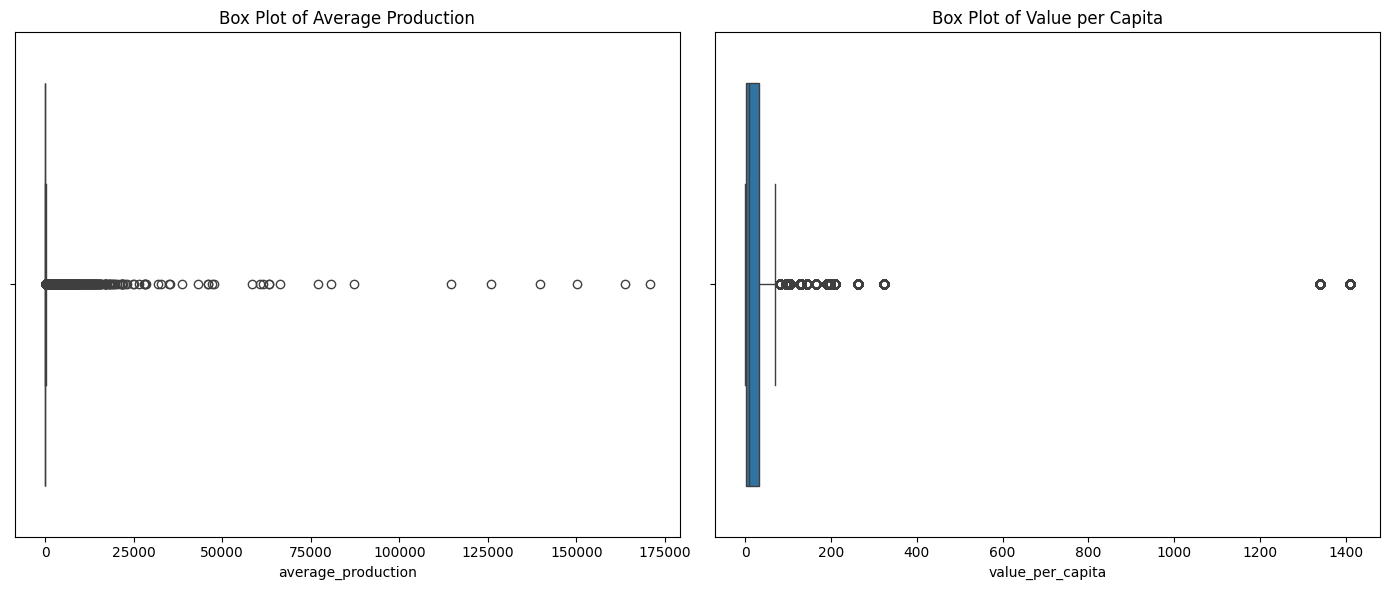

In [39]:
# Plot to check the outliers in the average production and value per capita

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.boxplot(x=merged_df['average_production'], ax=axes[0])
axes[0].set_title('Box Plot of Average Production')

sns.boxplot(x=merged_df['value_per_capita'], ax=axes[1])
axes[1].set_title('Box Plot of Value per Capita')

plt.tight_layout()
plt.show()

#### Group-Based Statistics


Group by area


In [40]:
merged_df.groupby('area').agg({
    'average_production': ['mean', 'min', 'max', 'median', 'std'],
})

average_production                     \
                                                 mean  min           max   
area                                                                       
Afghanistan                                156.663333  0.0   3266.811321   
Albania                                     36.386256  0.0    547.698113   
Algeria                                    232.899117  0.0   4771.132075   
Angola                                     122.211528  0.0   2350.792453   
Antigua and Barbuda                          0.716981  0.0     10.396226   
...                                               ...  ...           ...   
Venezuela (Bolivarian Republic of)         194.598403  0.0   2293.566038   
Viet Nam                                   531.120305  0.0  10144.452830   
Yemen                                       72.900745  0.0   1976.301887   
Zambia                                      49.636321  0.0   1183.792453   
Zimbabwe                                    54.747076  0.0   1469.811321   

                                                            
                                       median          std  
area                                                        
Afghanistan                         14.433962   475.311572  
Albania                              2.622642   100.213216  
Algeria                             10.603774   681.038196  
Angola                               8.150943   348.506708  
Antigua and Barbuda                  0.000000     1.866105  
...                                       ...          ...  
Venezuela (Bolivarian Republic of)  21.556604   428.648377  
Viet Nam                            75.528302  1441.316038  
Yemen                                5.452830   228.312172  
Zambia                               1.679245   163.471642  
Zimbabwe                             4.886792   174.326752  

[172 rows x 5 columns]

In [41]:
merged_df.groupby('area').agg({
    'value_per_capita': ['mean', 'min', 'max', 'median', 'std']
})

value_per_capita                        \
                                               mean        min        max   
area                                                                        
Afghanistan                               35.530081  35.530081  35.530081   
Albania                                    2.930187   2.930187   2.930187   
Algeria                                   41.318142  41.318142  41.318142   
Angola                                    29.784193  29.784193  29.784193   
Antigua and Barbuda                        0.102012   0.102012   0.102012   
...                                             ...        ...        ...   
Venezuela (Bolivarian Republic of)        31.977065  31.977065  31.977065   
Viet Nam                                  95.540800  95.540800  95.540800   
Yemen                                     28.250420  28.250420  28.250420   
Zambia                                    17.094130  17.094130  17.094130   
Zimbabwe                                  16.529904  16.529904  16.529904   

                                                    
                                       median  std  
area                                                
Afghanistan                         35.530081  0.0  
Albania                              2.930187  0.0  
Algeria                             41.318142  0.0  
Angola                              29.784193  0.0  
Antigua and Barbuda                  0.102012  0.0  
...                                       ...  ...  
Venezuela (Bolivarian Republic of)  31.977065  0.0  
Viet Nam                            95.540800  0.0  
Yemen                               28.250420  0.0  
Zambia                              17.094130  0.0  
Zimbabwe                            16.529904  0.0  

[172 rows x 5 columns]

Group by continent


In [42]:
merged_df.groupby('continent').agg({
    'average_production': ['mean', 'min', 'max', 'median', 'std']
})

average_production                                            
                            mean  min            max     median          std
continent                                                                   
Africa                137.094308  0.0   18081.981132   3.641509   666.732046
Asia                  622.694665  0.0  170690.452830   9.009434  5328.369857
Europe                381.951031  0.0   35149.590909  13.846913  1582.509259
North America         367.167041  0.0  139783.094340   1.471698  4049.862584
Oceania                52.403154  0.0    4642.830189   0.566038   282.879666
South America         314.121381  0.0   20385.754717  12.188679  1363.204292

In [43]:
merged_df.groupby('continent').agg({
    'value_per_capita': ['mean', 'min', 'max', 'median', 'std']
})

value_per_capita                                              
                          mean       min          max     median         std
continent                                                                   
Africa               27.083160  0.204327   190.886311  17.094130   35.602057
Asia                109.277925  0.428697  1409.517397  20.876917  298.448881
Europe               20.159273  0.335025   143.989754   8.735453   29.686296
North America        27.061767  0.055345   324.459463   4.098587   72.187064
Oceania               3.925730  0.116398    24.450561   0.283007    7.849592
South America        37.065123  0.563402   209.288278  18.054726   56.484878

**Insights:**

> In relation to 'value_per_capita,' Asia stands out with the highest mean and maximum values, indicating significant economic output - which is likely due to its larger agricultural base and focus.

> The standard deviation is notably high in Asia and North America, suggesting a wide range of values that could be attributed to the 'values' in the dataset.

> Oceania shows the lowest mean and maximum values, which reflects lesser agricultural activities in contrast to Asia.


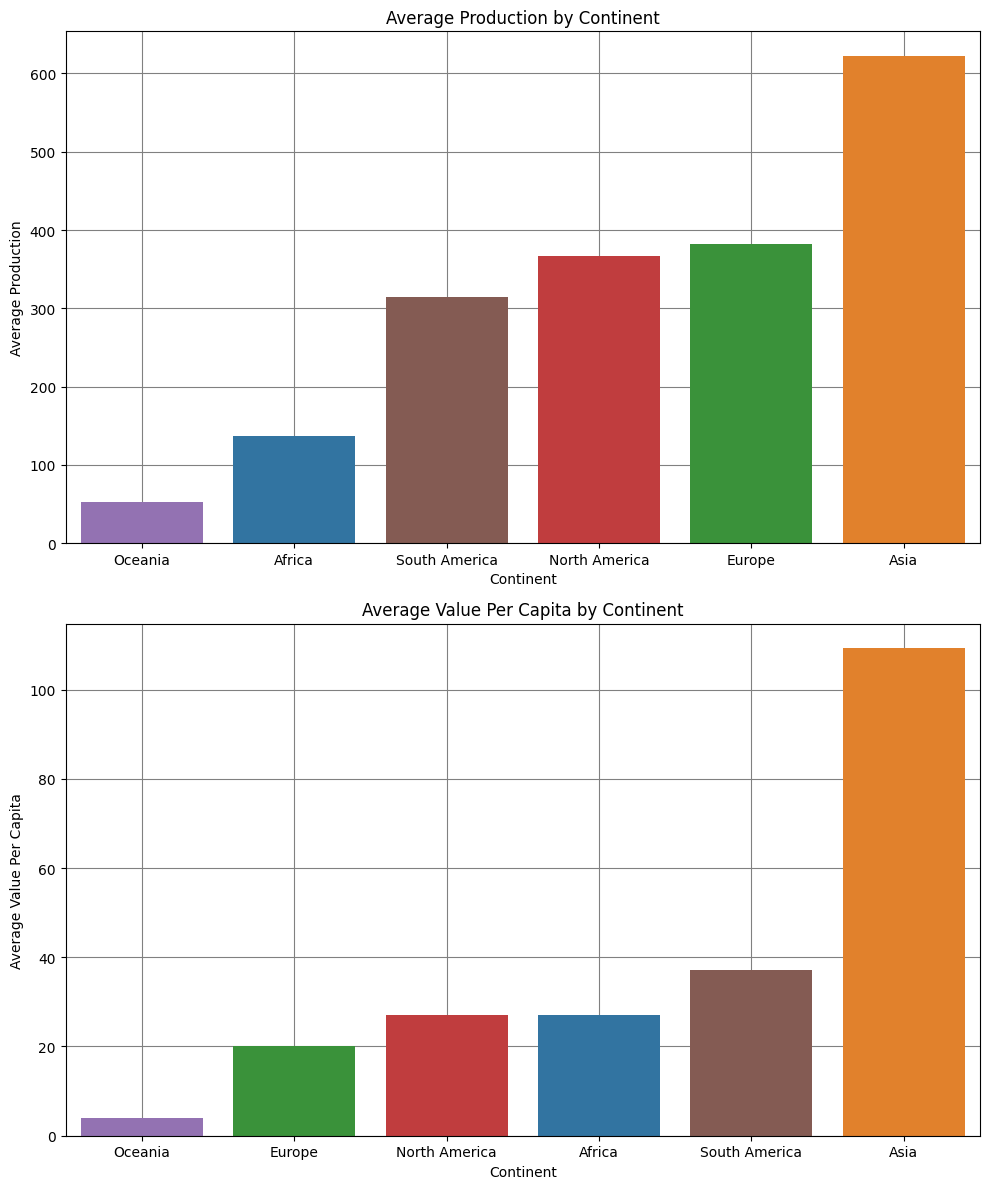

In [44]:
# Calculate the average production
ave_production_continent = merged_df.groupby('continent')['average_production'].mean().sort_values()

# Calculate the average value per capita
vpc_continent = merged_df.groupby('continent')['value_per_capita'].mean().sort_values()

# Palette
col_continent = {
    'Africa': '#1f77b4',            # blue
    'Asia': '#ff7f0e',              # orange
    'Europe': '#2ca02c',            # green
    'North America': '#d62728',     # red
    'Oceania': '#9467bd',           # purple
    'South America': '#8c564b'      # brown
}

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

sns.barplot(
    x=ave_production_continent.index, 
    y=ave_production_continent.values, 
    hue=ave_production_continent.index, 
    palette=col_continent,
    ax=axes[0]
)

axes[0].set_title('Average Production by Continent')
axes[0].set_xlabel('Continent')
axes[0].set_ylabel('Average Production')
axes[0].grid(True, color='gray', zorder=2)
axes[0].set_axisbelow(True)

sns.barplot(
    x=vpc_continent.index, 
    y=vpc_continent.values, 
    hue=vpc_continent.index, 
    palette=col_continent,
    ax=axes[1]
)
axes[1].set_title('Average Value Per Capita by Continent')
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Average Value Per Capita')
axes[1].grid(True, color='gray', zorder=2)
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

**Insights:**

> Asia leads significantly in average production, more than five times higher than Africa and nearly twice that of Europe.

> Oceania has the lowest production figures, which may reflect smaller agricultural sectors or less intensive farming practices compared to other regions.

> North America and Europe have comparable production levels, suggesting similar capabilities or resources dedicated to agricultural output.

> Asia stands out with a notably higher value per capita compared to other continents, indicating a stronger economic return per person from agriculture.

> In contrast, Oceania exhibits the lowest value, suggesting limited agricultural productivity.

> Europe, North America, and South America show moderate values, with South America slightly higher.


### **Correlation Analysis**


#### Correlation Matrix


In [45]:
# Only include columns that are relevant to correlation matrix
numeric_cols = year_cols + ['value', 'value_per_capita','average_production']

# Create correlation matrix using existing method from Pandas
correlation_matrix = merged_df[numeric_cols].corr()
correlation_matrix

y1961     y1962     y1963     y1964     y1965  \
y1961               1.000000  0.996953  0.991819  0.982617  0.986427   
y1962               0.996953  1.000000  0.996036  0.988794  0.991423   
y1963               0.991819  0.996036  1.000000  0.997223  0.995657   
y1964               0.982617  0.988794  0.997223  1.000000  0.994727   
y1965               0.986427  0.991423  0.995657  0.994727  1.000000   
y1966               0.982623  0.989008  0.993844  0.992247  0.997595   
y1967               0.981941  0.987950  0.993042  0.992647  0.996960   
y1968               0.983367  0.989043  0.994558  0.993602  0.996640   
y1969               0.984125  0.989106  0.991925  0.989727  0.996408   
y1970               0.971267  0.978507  0.984254  0.984811  0.992271   
y1971               0.971904  0.978209  0.983963  0.984729  0.993649   
y1972               0.969788  0.975131  0.981964  0.984012  0.992194   
y1973               0.965995  0.972906  0.978619  0.979481  0.988771   
y1974               0.948810  0.959183  0.967759  0.970780  0.976828   
y1975               0.951767  0.962277  0.971316  0.975003  0.979773   
y1976               0.948360  0.957805  0.969184  0.974360  0.978650   
y1977               0.946692  0.957064  0.965907  0.970853  0.976725   
y1978               0.945641  0.955960  0.965373  0.970161  0.976856   
y1979               0.938790  0.948376  0.961242  0.968651  0.973106   
y1980               0.922141  0.935169  0.948206  0.957048  0.961199   
y1981               0.926234  0.936979  0.951578  0.961329  0.962771   
y1982               0.919876  0.930890  0.945120  0.955131  0.959222   
y1983               0.901895  0.914825  0.930415  0.942673  0.943331   
y1984               0.902069  0.913413  0.929373  0.941510  0.941875   
y1985               0.898378  0.910413  0.927254  0.940145  0.937522   
y1986               0.902297  0.911732  0.926688  0.938387  0.936254   
y1987               0.901603  0.911627  0.925401  0.936302  0.933948   
y1988               0.877996  0.889605  0.904598  0.917282  0.909939   
y1989               0.882493  0.893715  0.907974  0.920430  0.913703   
y1990               0.891423  0.900342  0.914034  0.924700  0.921660   
y1991               0.886957  0.895342  0.907892  0.918397  0.914733   
y1992               0.882953  0.890341  0.901639  0.911330  0.907868   
y1993               0.868424  0.875133  0.886130  0.894968  0.890784   
y1994               0.868348  0.873124  0.882643  0.890499  0.887430   
y1995               0.846943  0.852833  0.862569  0.870491  0.865589   
y1996               0.842994  0.847451  0.856210  0.863423  0.859015   
y1997               0.837243  0.840026  0.847073  0.853356  0.848928   
y1998               0.835312  0.838312  0.844745  0.850750  0.846337   
y1999               0.825464  0.827274  0.831834  0.836092  0.832062   
y2000               0.806910  0.805770  0.806967  0.808016  0.803403   
y2001               0.797262  0.795246  0.795269  0.795379  0.791050   
y2002               0.778486  0.775849  0.774626  0.773762  0.768969   
y2003               0.780499  0.777274  0.775611  0.774378  0.769868   
y2004               0.783211  0.779450  0.777161  0.775377  0.771424   
y2005               0.773558  0.769491  0.766702  0.764581  0.760267   
y2006               0.748388  0.744181  0.742272  0.740976  0.733543   
y2007               0.744814  0.739777  0.737603  0.736026  0.728148   
y2008               0.726683  0.721495  0.719147  0.717103  0.708937   
y2009               0.717692  0.712528  0.710189  0.708294  0.699476   
y2010               0.701682  0.696496  0.694271  0.692414  0.682986   
y2011               0.689817  0.684632  0.683303  0.681788  0.672057   
y2012               0.678682  0.672916  0.671622  0.669820  0.660128   
y2013               0.684139  0.677957  0.676580  0.674684  0.665559   
value               0.214798  0.220389  0.223071  0.226653  0.224395   
value_per_capita    0.214798  0.220389  0.223071  0.226653  0.2

**Insights:**

> The data accross years, from 1961 to 2013 show a high correlation, often close to 1. It indicates that production values are fairly consistent or stable, which means that agricultural practices remain effective over time.

> The 'value' and and 'value_per_capita' metrics show a lower correlation with the yearly data. It may indicate that in spite of production being stable, the economic value derive does not increase - in direct proportion.


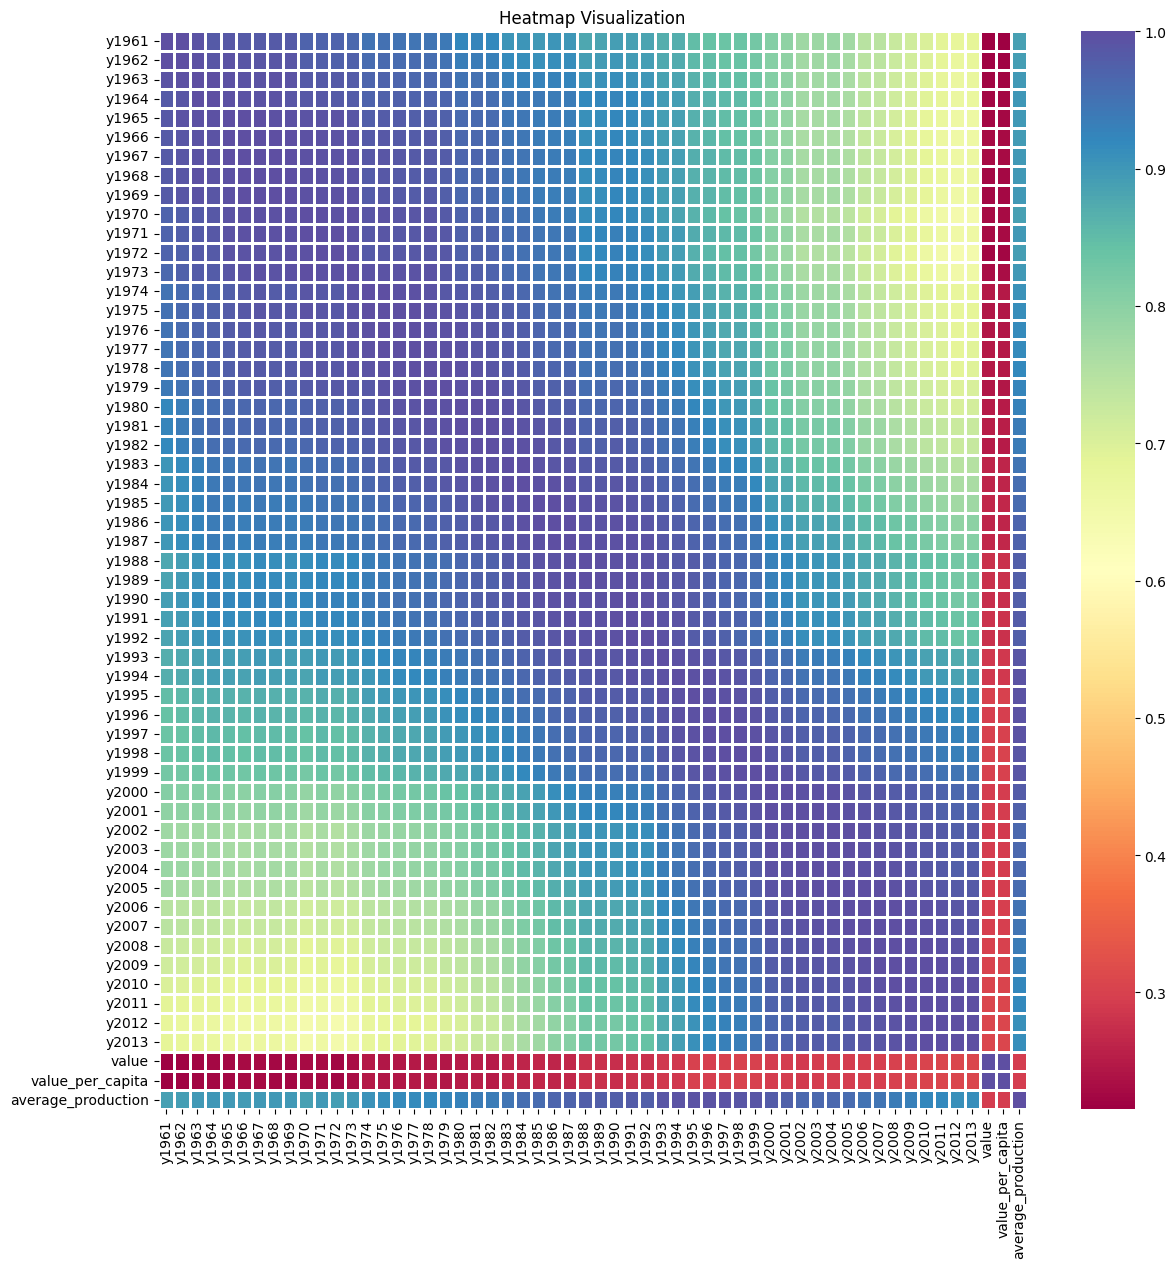

In [46]:
# Generate the heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, cmap='Spectral', linewidths=1)
plt.title('Heatmap Visualization')
plt.show()

**Insights:**

> The heatmap shows that each year is highly correlated with itself (represented by the purple diagonal), there is also a noticeable shift around the mid-1990s. Before this period, the correlations between different years (moving away from the purple diagonal) remain relatively strong.

> However, around y1994, the correlation between different years starts to decrease more rapidly, this is indicated by the quicker transition from purple to green and yellow tones. This suggests that the relationship between years weakens more significantly during the mid-1990s, indicating a change in the data trends.


## `Part 3: Data Visualization`


### **Time-Series Analysis**


#### Line Plot


In [47]:
def line_plot(df, location, top_location, value, top_value, element):
    # Group by specific location (area or continent), calculate their mean and select the top locations with highest mean value
    top_locations = df.groupby(location)[value].mean().nlargest(top_location).index
    
    _, axes = plt.subplots(nrows=len(top_locations), figsize=(10, 15))
    
    for i, loc in enumerate(top_locations):
        # Filter the current location and element and get the top items by average value
        data = df[(df[location] == loc) & (df['element'] == element)]
        top_items = data.groupby('item')[value].mean().nlargest(top_value).index
        
        for item in top_items:
            # Filter the data for current item and calculate the mean across the years
            item_data = data[data['item'] == item][year_cols].mean()
            item_data.index = item_data.index.str[1:].astype(int)  
            
            axes[i].plot(item_data.index, item_data.values, label=item)
        
        axes[i].set_title(f'Top {top_value} {element} Items in {loc}')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('{value}')
        axes[i].legend(title=f'{element} Items')
        axes[i].grid(True)
      
    plt.tight_layout()  
    plt.show()

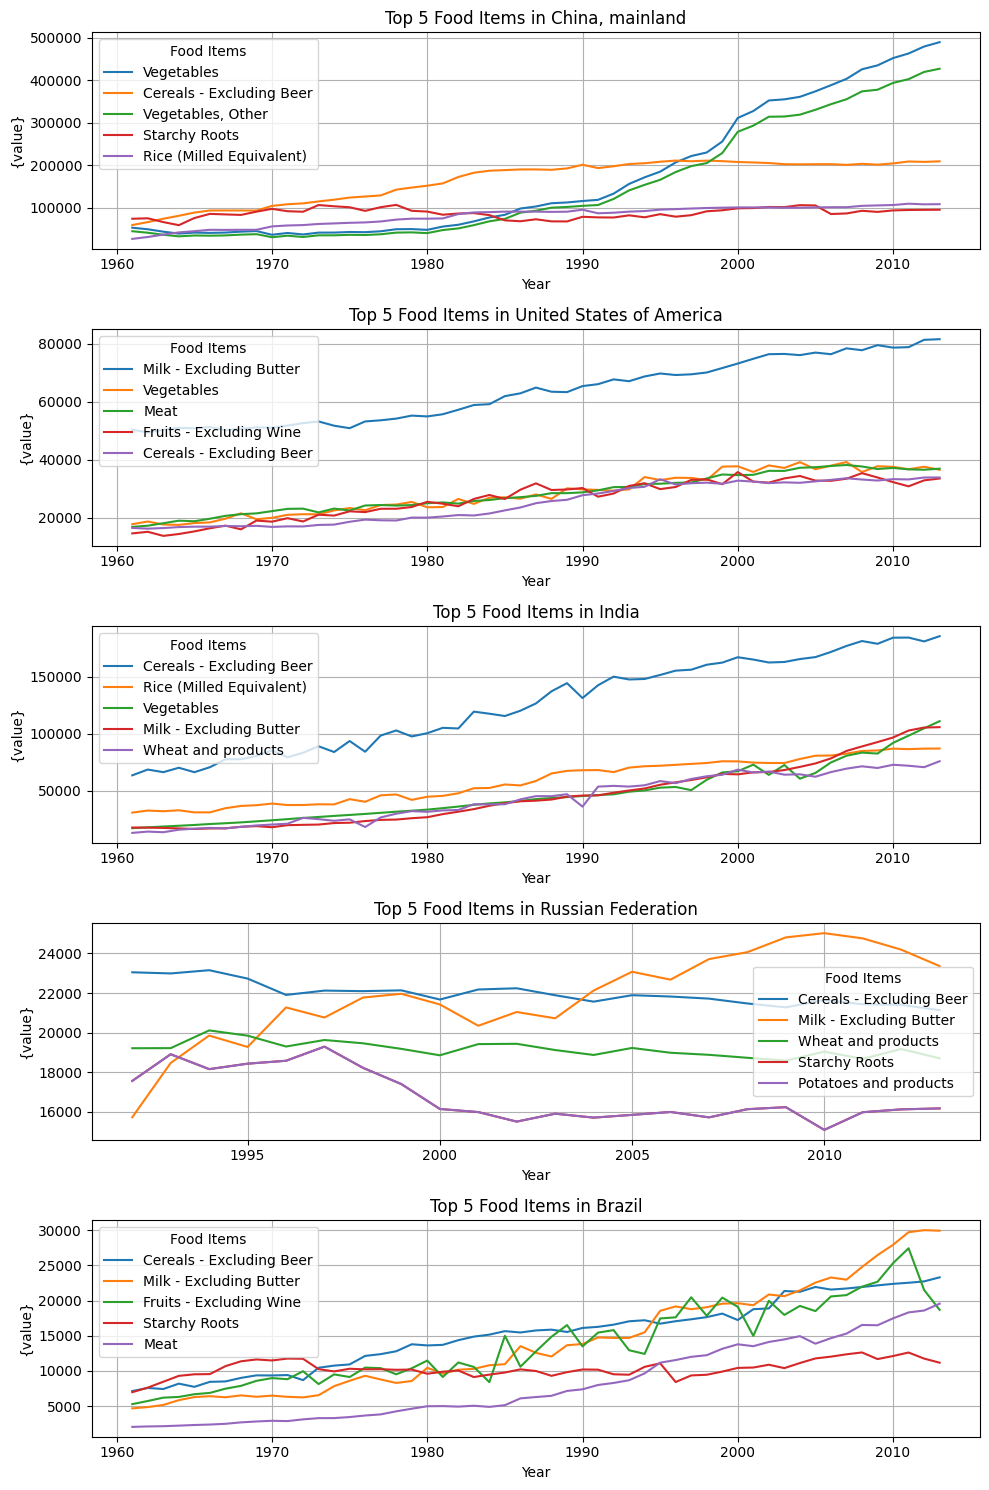

In [48]:
# Line plot for Food items in the top 5 areas in average production
line_plot(
    df=merged_df,
    location='area',
    top_location=5,
    value='average_production',
    top_value=5,
    element='Food'
)

**Insights:**
> The graph illustrates the top 5 food items in China, the United States, India, the Russian Federation, and Brazil, over time.

`For Food:`
> **China, mainland:** Vegetables dominate as the top food item, with a sharp increase in value starting from the late 1990s. Cereals (excluding beer) also rank highly but plateaued around the same time. Starchy roots and rice show consistent values without significant growth or decline. The possible rise in vegetable consumption from the late 1990s may be because of China's economic reforms and rapid urbanization at that time - which led to changes in dietary habits and preferences. A noticeable plataeu in Cereals- Excluding Beer could be because of a shift towards other food sources, as the Chinese diversified its diet.

> **United States of America:** Milk (excluding butter) shows the highest values and a steady increase, indicating its significant importance. Other food items like vegetables, meat, fruits (excluding wine), and cereals (excluding beer) also show growth but at a lower pace. The prominence of milk shows the country's strength in the dairy industry, as well as its importance in their dietary culture. Additionally, the growth of other food items suggests a balanced diet that includes a variety of food groups, reflecting the country's agricultural diversity and food availability.

> **India:** Cereals (excluding beer) is the top food product in India by a significant margin. In similarity to the United States, the rest of the food items, e.g., Rice (milled equivalent), vegetables, milk (excluding butter), and wheat and products, are closely growing together. However, it is noticeable that Rice (milled equivalent) is seemingly approaching a plataeu. Whilst the rest of the products is still yet to reach their peak.

> **Russian Federation:** Food items in Russia show similar growth trends, with most products closely aligned in value.

> **Brazil:** Milk (excluding butter) is the top food product in recent years in Brazil. It is followed by fruits (excluding wine) and cereals (excluding butter). The rest of the food items, e.g., meat and starchy roots, are relatively close with one another, however, it is noticeable that the value of starchy roots still remain the same over the decades.

`Conclusion`
> The analysis of top food items over time in China, the United States, India, Russia, and Brazil reveals distinct national trends influenced by economic, cultural, and environmental factors. In China, rapid urbanization and economic reforms have led to increased vegetable consumption, while in the United States, steady growth in milk consumption underscores its cultural and dietary significance. India's focus on cereals highlights its staple food reliance, contrasting with Brazil's diverse but stable food item production.

> **Diversification of Crop Production:** Given the plateau in certain staple crops like cereals in China and rice in India, it is advisable for these countries to continue diversifying their agricultural production. This could include enhancing support for alternative crops that might better meet changing dietary preferences and economic conditions.

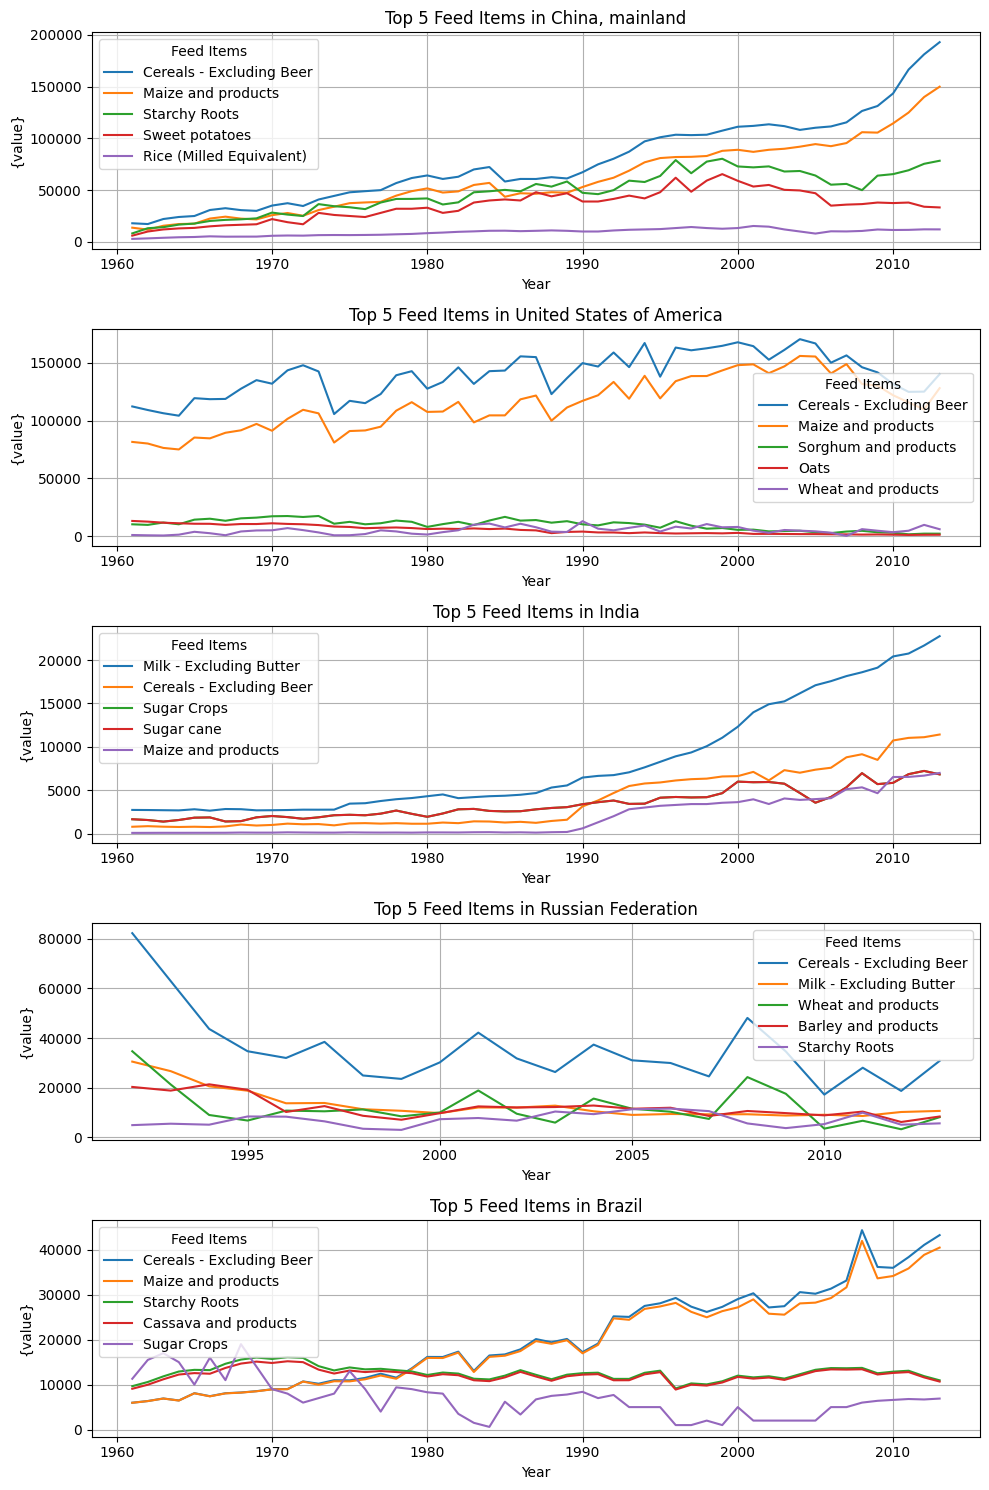

In [49]:
# Line plot for Feed items in the top 5 areas in average production
line_plot(
    df=merged_df,
    location='area',
    top_location=5,
    value='average_production',
    top_value=5,
    element='Feed'
)

**Insights:**
> The graph illustrates the top 5 feed items in China, the United States, India, the Russian Federation, and Brazil, in a given period of time. Cereals (excluding beer) are a dominant feed item across all these countries, highlighting their importance in global livestock feeding practices. Maize is also significant, especially in countries like the United States, China, and Brazil.

`For Feed:`
> **China, mainland:** In relation to trends, there is a clear upward trend in the use of Cereals - excluding beer and Maize and Products, especially after and around the year 2000. Sweet Potatoes and Starchy Roots remain relatively stable, with slight increase in the recent years. As mentioned and similar to earlier, the strong increase in cereals and maize can be attributed to the rapid industrialization and urbanization of China, leading to higher demand for livestock feed to meet the growing consumption of meat.

> **United States of America:** The graph shows consistent high values for cereals - excluding beer and maize and products. Wheat and products, as well as other feed items, show relatively lower and more stable values. The consistent high values for cereals and maize reflect the importance of these crops in the U.S. agricultural system, especially for feeding livestock.

> **India:** There is a steady increase in the use of milk (excluding butter) particularly after the 1990s. Maize and sugar cane show relatively stable trends with a slight upward movement. The rise in milk as a feed item is closely related to the country;s strong dairy industry, which is one of the largest in the world.

> **Russian Federation:** The graphs for Russia show a sharp decline in cereals, and a more subtle decline in milk, and other feed items after the dissolution of the Soviet Union in the early 1990s, with some stabilization afterward. Hence, such event could affect the decline of feed value - which could shortly distabilize agricultural productivity.

> **Brazil:** Brazil's feed items show a gradual increase, with cereals and maize leading the trends. Starchy roots and cassava also show growth, at lower levels. Sugar crops seemingly was the top feed item, but slowly went on a decline in terms of its value.

`Conclusion:`
> The comparative analysis of feed item production across China, the United States, India, Russia, and Brazil highlights the pivotal role of cereals and maize in sustaining global livestock or feed industries. The varied trajectories in each country, from steady growth in Brazil to fluctuating trends in Russia post-Soviet Union dissolution, illustrate the complex interplay of economic, political, and agricultural dynamics shaping global feed production.

> **Strengthen Agricultural Infrastructure:** Invest in agricultural infrastructure improvements, such as storage facilities, transportation, and market access, particularly in countries like Russia and India where feed production has shown fluctuation or decline.

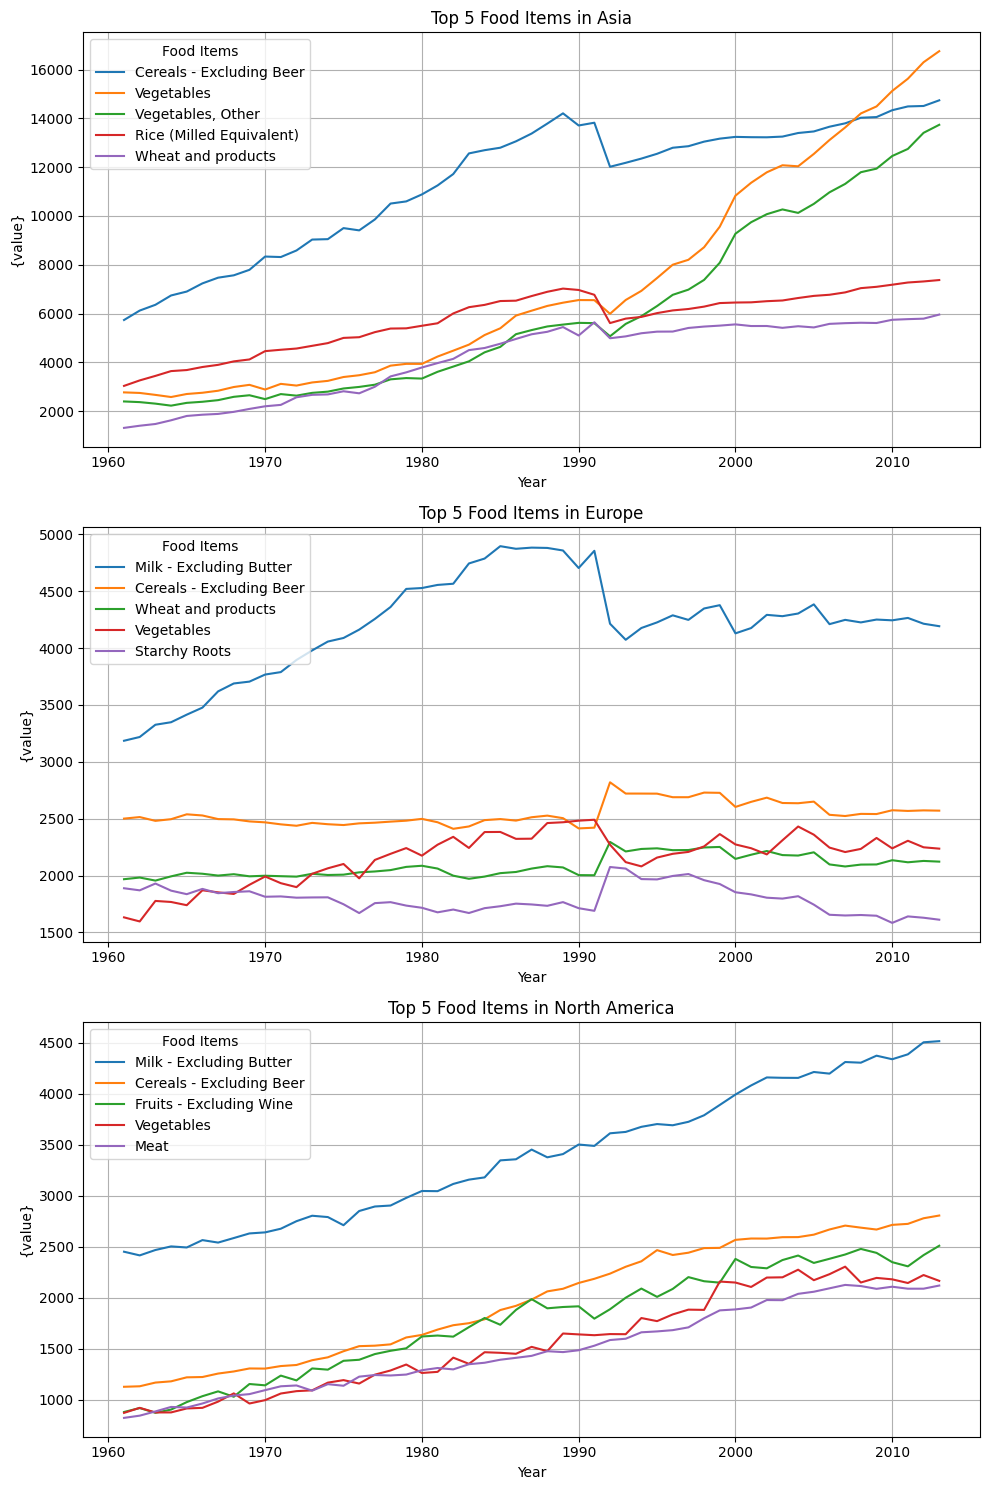

In [50]:
# Line plot for Food items in the top 3 continents in average production
line_plot(
    df=merged_df,
    location='continent',
    top_location=3,
    value='average_production',
    top_value=5,
    element='Food'
)

**Insights:**
> These line plots illustrate the top 5 food items top 3 leading continents: Asia, Europe, and North America. Each line represents the line trend of each food item throughout the years.

`For Food:`
> **Asia:** A steady increase for production of all food items are seen from 1960s - early 1990s, and a steady increase afterwards in the production of rice, wheat, and vegetables. This rise reflects the growing population's need for these staples, particularly cereals like rice, and a likely shift toward healthier diets and better farming methods.

> **Europe:** In Europe, milk and dairy productions has been growing consistently, showing the importance of livestock and dairy industries possibly also because of Europe's favorable climate conditions for raising dairy cattle. Cereal production, especially wheat, has remained steady, reflecting stable farming practices and traditional diets. While, the production of starchy roots like potatoes has slightly declined, likely due to shifts in the region's dietary preferences.

> **North America:** All food items in the graph show consistent production increases, likely due to expanded farmland and improved farming techniques. Milk production has surged from 2,500 in 1960 to 4,500 in 2010, reflecting substantial growth driven by increased demand and advancements in dairy farming. In contrast, other food items have seen more modest increases, from under 1,500 in 1960 to under 3,000 in 2010, indicating slower growth in these sectors.

`Conclusion`
> Asia's dramatic increase in the production of staples like vegetables and cereals aligns with its growing population and a shift towards more sustainable farming methods. In contrast, Europe shows steady growth in milk and dairy due to favorable conditions and traditional diets, while North America demonstrates overall growth in food production.

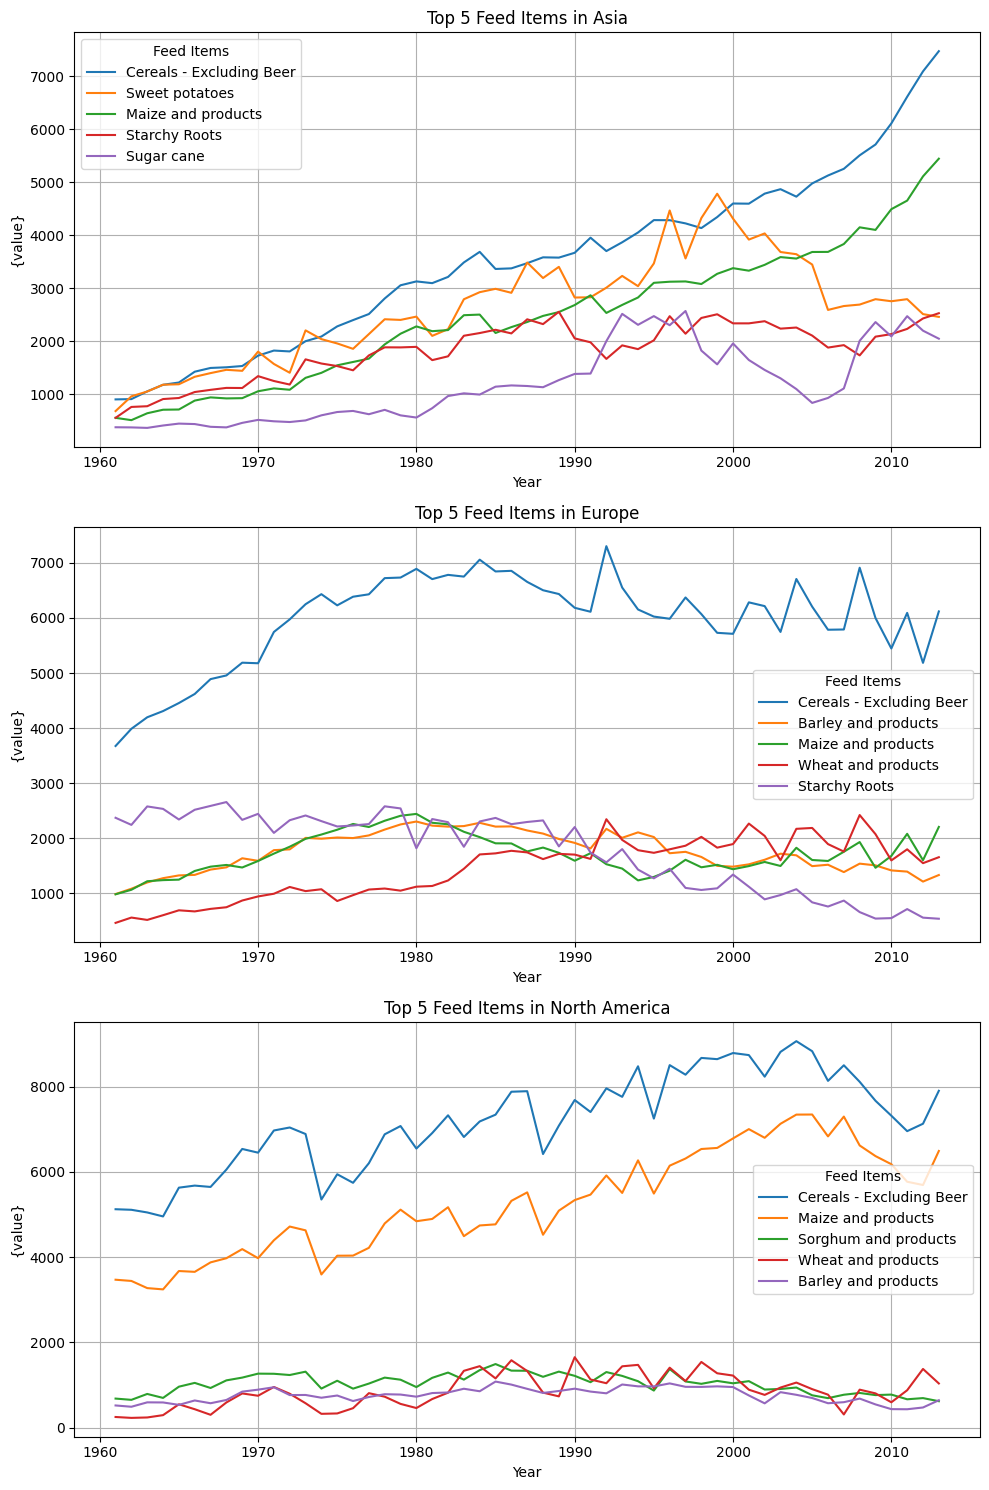

In [51]:
# Line plot for Feed items in the top 3 continents in average production
line_plot(
    df=merged_df,
    location='continent',
    top_location=3,
    value='average_production',
    top_value=5,
    element='Feed'
)

**Insights:**
> These line plots illustrate the top 5 feed items top 3 leading continents: Asia, Europe, and North America. Each line represents the line trend of each food item throughout the years.

`For Food:`
> **Asia:** Cereals (excluding beer) have seen a consistent rise, peaking sharply around early 2010 - and still rising seemingly. Maize and products have grown steadily, particularly after 1980. Sweet potatoes and starchy roots also show steady growth, although starchy roots saw a decline post-1990. Sugar cane, while consistently low, shows a slight upward trend in recent years.

> **Europe:** Cereals (excluding beer) dominate, showing strong growth until around 1990, followed by fluctuations. Barley and wheat products exhibit relatively stable trends with minor fluctuations. Maize products show gradual growth, while starchy roots see a decline from the mid-1980s onwards.

> **North America:** Cereals (excluding beer) and maize products have strong upward trends, with cereals leading. Sorghum shows an early increase, followed by a decline after the mid-1980s. Wheat and barley products have relatively flat trends, with barley declining slightly after 1990.

`Conclusion`
> Cereals (excluding beer) consistently lead as the top feed item across all three continents, with Asia and North America showing significant growth, particularly in the last two decades. In Europe, cereals peaked around 1990 but have since fluctuated, while maize and other grains have grown steadily in North America.

### **Comparison Plot**


#### Plot Creation


In [52]:
def comparison_plot(df, location, top_location, value, top_value, element):
    # Get the top locations by average value
    top_locations = df.groupby(location)[value].mean().nlargest(top_location).index
    
    # Filter by the given element and top locations
    data = df[df[location].isin(top_locations) & (df['element'] == element)]
    
    # Get the top items for each location
    top_items = data.groupby([location, 'item'])[value].mean()
    top_items = top_items.groupby(location).nlargest(top_value).reset_index(level=0, drop=True).reset_index()
    
    # Create subplots
    _, axes = plt.subplots(nrows=len(top_locations), figsize=(10, 15))
    cmap = plt.colormaps.get_cmap('viridis')
    
    for i, loc in enumerate(top_locations):
        data = top_items[top_items[location] == loc]
        color_list = cmap(np.linspace(0, 1, top_value))
        
        axes[i].barh(data['item'], data[value], color=color_list)
        axes[i].set_title(f'Top {top_value} {element} Items in {loc}')
        axes[i].set_xlabel(value)
        axes[i].set_ylabel(f'{element} Item')

        # Set grid lines behind
        axes[i].set_axisbelow(True)
        axes[i].grid(True, zorder=0)
        
    plt.tight_layout()
    plt.show()

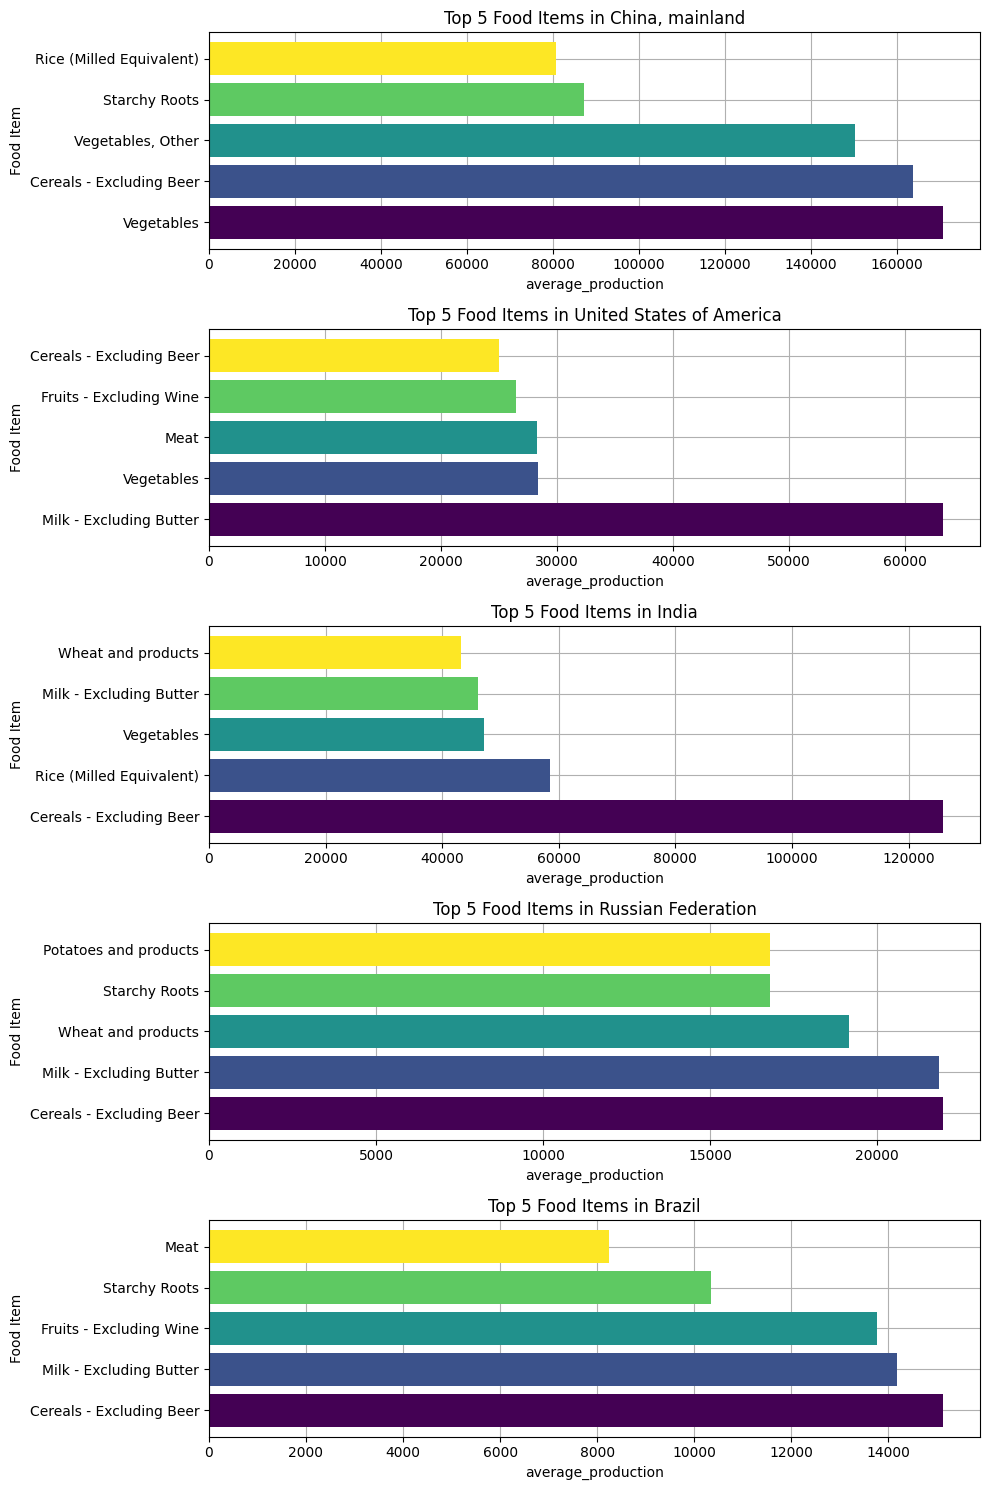

In [53]:
# Comparison plot for Food items in the top 5 areas in average production
comparison_plot(
    df=merged_df,
    location='area',
    top_location=5,
    value='average_production',
    top_value=5,
    element='Food'
)

**Insights:**
> The graph shows the top 5 food items by average production in China, the United States, India, Russia, and Brazil. Cereals (excluding beer) are particularly prevalent across several countries, including Brazil, Russia, and India.

`For Food:`
> **China, mainland:** The top food items are vegetables, cereals, starchy roots, and rice. Vegetables is the most produced food item, reflecting its central role in the Chinese diet. Other vegetables and cereals (excluding beer) also have high production levels, indicating a mix of grains and fresh produce. Starchy roots and rice have lower production, likely due to a shift in diets.

> **United States of America:** Cereals (excluding beer) leads in production, highlighting the importance of dairy for American diet and agriculture. Vegetables and meat follow, suggesting a focus on greens and poultry products.

> **India:** Their top 5 food items are cereals, rice, vegetables, and wheat, highlighting the central role of grains in the Indian diet. The absence of meat in the top 5 can be attributed to cultural and religious factors, such as Hinduism's promotion of vegetarianism and Islam's dietary restrictions. For further insight, milk (excluding butter) and cereals (excluding beer) lead in feed production, showing a balanced reliance on both animal-based and plant-based feed sources. Sugar crops and maize also play a significant role, though to a slightly lesser extent.

> **Russian Federation:** Cereals and milk are the leading food items in terms of production, with their average production levels closely matching each other. This possibly indicates the country's importance to both items pertaining to the country's food production strategy. Additionally, it is noteworthy that potatoes and starchy roots, despite having the lowest average production among the top food items, exhibit a similar production mean as well.

> **Brazil:** Cereals (excluding beer) and maize are the most produced feed items, reflecting their critical role in Brazilian agriculture. Starchy roots and cassava are also important but have lower production averages. Sugar crops have the lowest production among the top feed items. This diversity underscores Brazil's extensive agricultural resources and favorable tropical and subtropical climates, which support a wide range of crops.

`Conclusion`
> The analysis reveals a strong emphasis on cereals across all examined countries, highlighting their significance as food. Variations in the top food items, such as the prominence of vegetables in China and the absence of meat in India's top production, reflect diverse cultural dietary practices and agricultural focuses.

> **Promote Crop Rotation and Sustainable Farming Practices:** Given the heavy reliance on cereals in countries like India, Russia, and Brazil, promoting crop rotation and other sustainable agriculture practices could help maintain soil health and boost productivity.

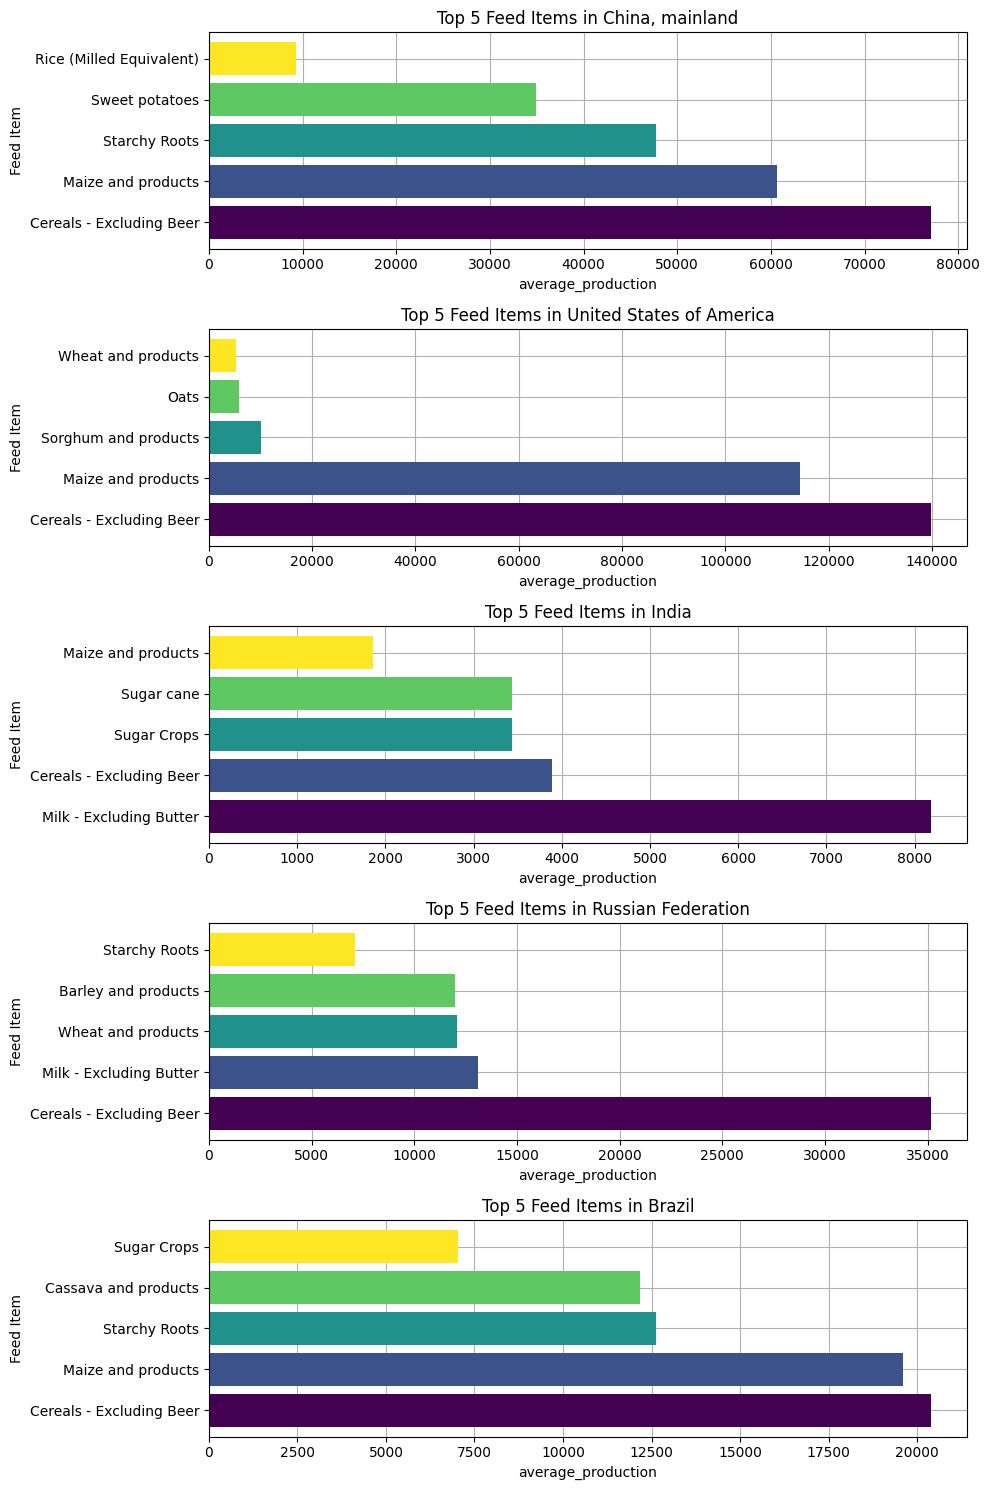

In [54]:
# Comparison plot for Feed items in the top 5 areas in average production
comparison_plot(
    df=merged_df,
    location='area',
    top_location=5,
    value='average_production',
    top_value=5,
    element='Feed'
)

**Insights:**
> These comparison plots illustrate the top 5 feed items by average production in the top 5 leading countries: China, United States, India, the Russian Federation, and Brazil. Each bar represents the average production quantity for a specific food or feed item within each country.

`For Feed:`
>**China and United States:** Both countries are top producers of maize and cereals for animal feed, highlighting how crucial these grains are for their large livestock industries, which are essential for meeting high domestic demand for meat and dairy products.

>**India:** Maize and cereals are also prominent in feed production, supporting the large livestock sector, which plays a crucial role in the rural economy. Using grain-based feed helps maintain a big livestock population, especially in a country where milk and dairy products are highly valued

>**Russian Federation:** he focus on wheat, barley, and cereals for feed emphasizes the use of grain-based feed for animals. This is essential in a country with long, cold winters, where livestock needs substantial feed supplies to survive the harsh conditions.

>**Brazil:** Large production of maize, cereals, and starchy roots supports its large agricultural sector geared toward livestock. As one of the world's top meat exporters, especially beef, Brazil has a high demand for feed to support its extensive livestock industry.


`Conclusion`
>The data shows how cultural, religious, and climatic factors affect the types of food and feed produced in each country. For example, India’s cultural preferences result in a diet rich in grains with less focus on meat, while Russia’s climate requires the cultivation of hardy crops. In the U.S. and Brazil, strong livestock industries lead to high production of feed, especially maize and cereals. These factors influence each country’s agricultural practices and food security, highlighting the link between culture, climate, and agriculture.

> **Development for other Possible Feed Alternatives:** Given the heavy reliance on cereals and milk for animal feed in major agricultural countries, investing in research for sustainable and alternative feed sources as well.

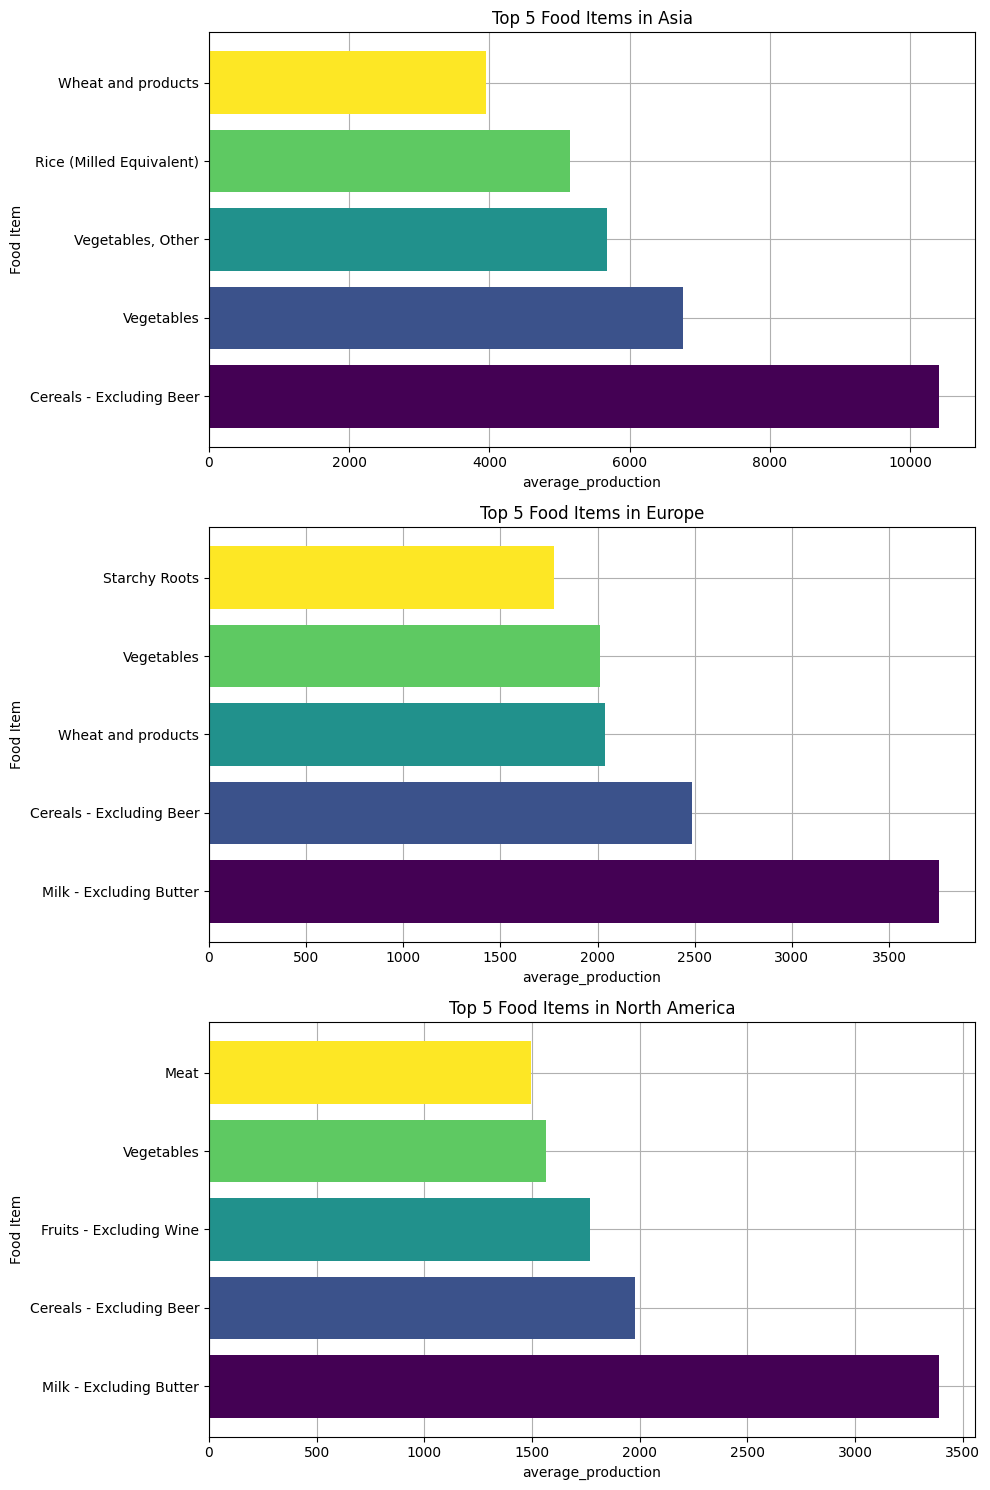

In [55]:
# Comparison plot for Food items in the top 3 continents in average production
comparison_plot(
    df=merged_df,
    location='continent',
    top_location=3,
    value='average_production',
    top_value=5,
    element='Food'
)

**Insights:**
> The graph shows the top 5 food items by average production in China, the United States, India, Russia, and Brazil. Cereals (excluding beer) are particularly prevalent across several countries, including Brazil, Russia, and India.

`For Food:`
>**Asia:** Asia's leading role in cereal production, especially rice and wheat, may be likely due to its large population and reliance on staple foods essential to traditional diets. Countries like China and India use extensive agricultural land for growing cereals to meet the needs of its large population. Furthermore, rice is a central part of cultural practices and cuisines in many Asian countries. This also applies in the high production of vegetables wherein, it is incorporated into a variety of dishes.

>**Europe:** In Europe, dairy industries helps produce a lot of milk, especially in Germany, France, and the Netherlands. The mild weather in Europe is good for growing cereals and wheat, which are important for foods like bread and pasta. Europe’s different climates and fertile soil also support growing various vegetables and starchy foods like potatoes, which are key parts of many European meals.

>**North America:** North America has a strong dairy industry, with the U.S. being in the top 10 largest milk producing countries. The vast agricultural lands in the U.S. and Canada support large-scale cereal production, including maize, wheat, and barley, which are used for food and livestock feed. The diverse climates in North America also allow for growing a wide range of fruits and vegetables. Additionally, large-scale livestock farming in North America, especially for beef, pork, and poultry, makes meat an important part of the diet in the U.S. and Canada.

`Conclusion:`
>  **Infrastructure Development:** Based on the bar plot of average production by continent, we can see that africa and oceania have signigicantly lower average agricultural production compared to other continents. This indicate that these continents are behind in agricultural productivity compared to other continents. Policymakers should prioritize implementing targeted agricultural development programs in Africa and Oceania. Solutions like investing in infrastructures and modern farming can help increase their production and also contribute to food security and poverty reduction in these regions.

> **Market Diversification:** Even though europe has the 2nd highest average production among continents, it has the 2nd lowest average value per capita. This shows despite high production levels, they cannot maximize the economic value of their products. It could also mean that the agricultural market in Europe could be saturated. It is recommended to expand their market by exploring new export markets which can help increase their products' value.

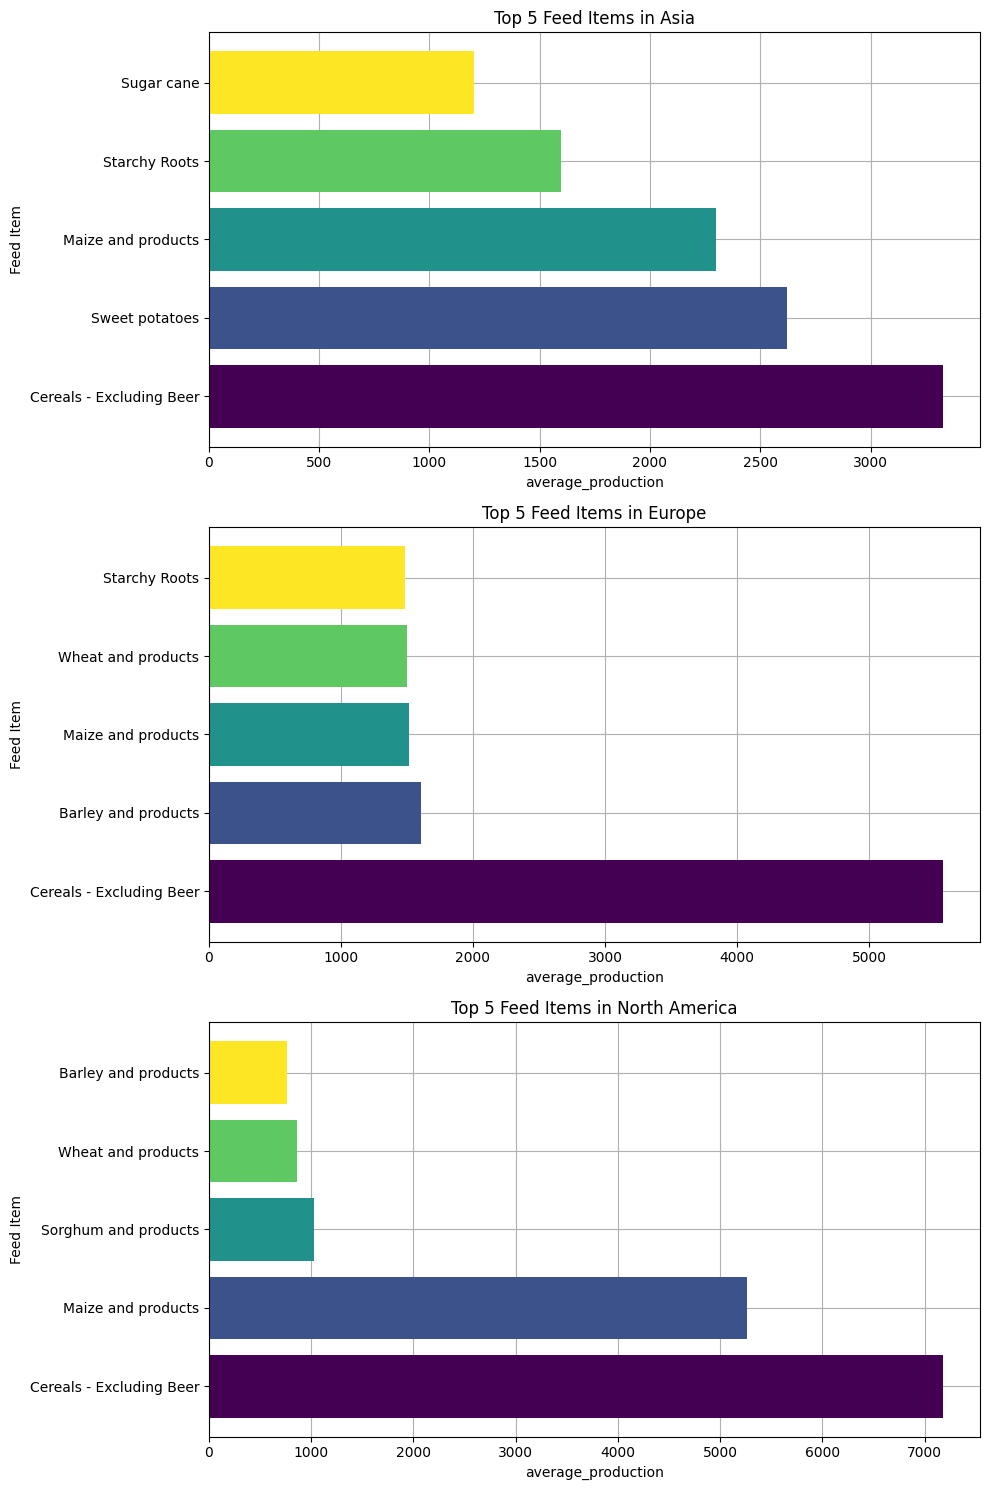

In [56]:
# Comparison plot for Feed items in the top 3 continents in average production
comparison_plot(
    df=merged_df,
    location='continent',
    top_location=3,
    value='average_production',
    top_value=5,
    element='Feed'
)

**Insights:**

> These comparison plots illustrate the top 5 food and feed items by average production in the top 3 leading continents: Asia, Europe, and North America. Each bar represents the average production quantity for a specific food or feed item within each continent.

`For Feed:`

>**Asia:** In Asia, cereals like rice and wheat as the leading feed items likely reflects the continent's agricultural focus and dietary habits. Starchy roots, such as cassava and sweet potatoes, also play a significant role, possibly due to their versatility and ability to thrive in tropical climates.

>**Europe:** In Europe, wheat and barley are the main feed components, showing the continent's agricultural methods and food preferences. Although starchy roots are present, they are less significant compared to Asia, possibly due to varying climate conditions or economic factors.

>**North America:** In North America, especially in the U.S., a lot of cereal crops are grown for animal feed, supporting the livestock industry. Maize is a key feed crop, important for both meat and dairy. Sorghum is used as a drought-resistant feed in drier areas. While, wheat is used for feed in Canada and the northern U.S., and barley is important for feeding cattle in the northern plains.

`Conclusion`
>The data reveals how cultural, climatic, and economic factors shape food and feed production across Asia, Europe, and North America. Asia’s prominence on rice and wheat reflects its population size and dietary habits, while starchy roots thrive in its tropical climates. Europe’s varied climates support its strong dairy and cereal industries, with potatoes and vegetables also being significant. In North America, extensive agricultural lands and diverse climates enable large-scale cereal production for both food and feed, including key crops like maize and sorghum. These patterns illustrate how regional factors influence agricultural practices and food systems.

### **Geographical Visualization**


#### Choropleth Map


In [57]:
# Get the mean of the important columns that will be used in choropleth map
avg_data_per_country = merged_df.groupby(['iso_alpha3', 'area'], as_index=False).agg({
    'value_per_capita': 'mean',
    'average_production': 'mean'
})

avg_data_per_country

iso_alpha3                  area  value_per_capita  average_production
0          AFG           Afghanistan         35.530081          156.663333
1          AGO                Angola         29.784193          122.211528
2          ALB               Albania          2.930187           36.386256
3          ARE  United Arab Emirates          9.400145           34.384687
4          ARG             Argentina         44.271041          503.171192
..         ...                   ...               ...                 ...
167        WSM                 Samoa          0.196440            2.329665
168        YEM                 Yemen         28.250420           72.900745
169        ZAF          South Africa         56.717156          329.053100
170        ZMB                Zambia         17.094130           49.636321
171        ZWE              Zimbabwe         16.529904           54.747076

[172 rows x 4 columns]

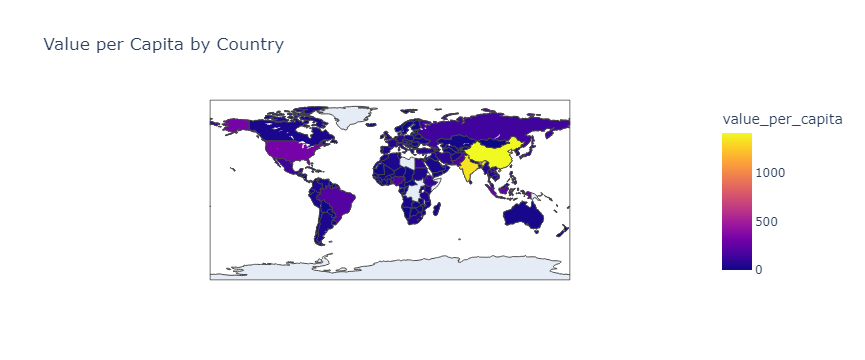

In [58]:
fig = px.choropleth(
    avg_data_per_country,
    locations='iso_alpha3',  
    color='value_per_capita', 
    hover_name='area', 
    color_continuous_scale=px.colors.sequential.Plasma,  
    projection='equirectangular', 
    title='Value per Capita by Country'
)

fig.show()

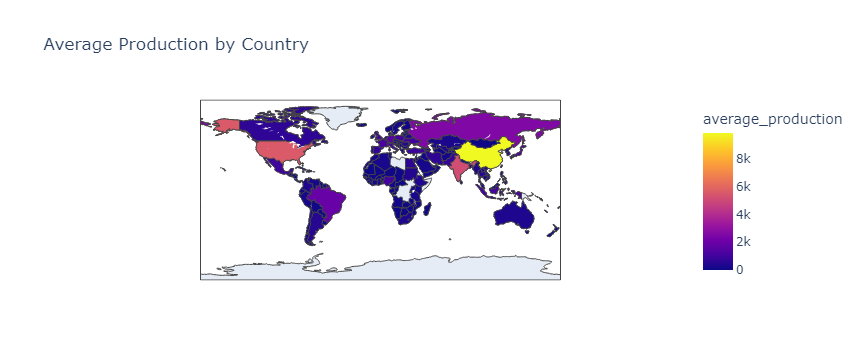

In [59]:
fig = px.choropleth(
    avg_data_per_country,
    locations='iso_alpha3',  
    color='average_production', 
    hover_name='area', 
    color_continuous_scale=px.colors.sequential.Plasma,  
    projection='equirectangular', 
    title='Average Production by Country'
)

fig.show()

**Analysis:**

> Some countries in North America, Europe, and parts of Asia tend to have higher value per capita, value, and average production. These are represented by lighter colored hues, while some regions in Africa, South America, and parts of Asia exhibit lower values.

>The overall distribution of colors on the map reveals regional disparities. For example, there appears to be a concentration of higher values in developed countries and regions with strong economies, while lower values are more prevalent in developing countries and regions facing economic challenges.

## `Part 4: Drawing Conclusions`


### **Analysis Summary**


#### Summary Report


>In Task 1, we created a data dictionary to understand the columns in our datasets, identified null values and duplicates, and standardized column names. Initially, we considered replacing null values with -1 but decided to retain them to preserve the integrity of statistical summaries and avoid skewed visualizations. We merged the datasets using an inner join on area_code and area, and engineered new variables such as years_existing, average_production, value_per_capita, and iso_alpha3. 

>In Task 2, we used the `.describe` method, box plots, and graphs to analyze patterns and outliers, and applied correlation matrices and heatmaps to explore relationships between variables. 

>For Task 3, we created line and comparison plots for the top 5 food and feed items for top leading countries and continents that revealed key production trends that are valuable for business professionals. 

#### Insights & Trends


### **Actionable Recommendations**


#### Recommendations


#### Contextual Relevance


**Introduction**

`Background Information`
>The Food and Agriculture Organization (FAO) serves as a specialized agency of the United Nations, aiming to eliminate hunger and improve nutrition and food security worldwide (FAO, n.d.). One of its primary data can be found in the FAO and FAOSTAT database, which offers extensive data on food and agriculture. The data holds information also from a vast number of countries.

>This dataset is quite useful for researchers, policymakers, and governments, since it provides reliable statistics that can help formulate informed decisions on food production and sustainability.

> It is from the analysis of these datasets that data analysts and stakeholders can generate patterns and propose solutions to challenges facing food distribution. Thus, the significance of this data goes far beyond just being numbers; it impacts policies internationally and helps in fighting hunger and poverty (FAO, n.d.).

`Global Implications`
> The insights derived from this analysis are vital for crafting robust agricultural policies aimed at further enhancing the production count and value of food and feed items in the world.

> For instance, the bar graph that shows the average production by continent illustrates that Asia has the largest yields in production. This could be due to warmer temperatures around this region. Moreover, the relatvely warmer regions, e.g., Africa and South America, may struggle to produce more feed and food because of their geographical location and climate.
> > Africa and Oceania have significantly lower average agricultural production compared to other continents, indicating lagging agricultural productivity. Policymakers should focus on enhancing agricultural development in these regions. Investments in infrastructure and modern farming techniques could boost production, contributing to food security and poverty reduction in Africa and Oceania.

`Task Importance`
> Analyzing agricultural data, in relation to food production and values, are vital for enhancing global food security and productivity. This in turn, help support economic stability among countries and public health for its citizens.

> Furthermore, as populations grow and environmental issues, e.g., _climate change_, continues to impact agriculture, the urgency for data-driven solutions in policy-making becomes important than ever.

`Objective of the Analysis`
> The primary objective of this analysis is to understand trends and patterns in agricultural production and its values using the FAO and FAOSTAT datasets among countries.

> Whereas, by assessing these trends, the analysis aims to understand the impact of different agricultural practices on global food security - based on recorded data.

> Whereas, this focused analysis will provide insights that can help shape effective agricultural strategies.

**Contextual Evidence**

`Dataset Description`
> **FAO:** It is data sourced by the Food and Agriculture Organization (FAO) from its member nations, offers a comprehensive overview of global food production patterns. It contains detailed annual data spanning from 1961 to 2013, covering a wide range of metrics, e.g., production values. Each entry in the dataset is categorized by various attributes including area (with both abbreviation and full name), item (including food items or products), and element (detailing the type of data recorded, such as production or consumption). The dataset also integrates geographical data, providing latitude and longitude coordinates for each country or region.

> **FAOSTAT:** It is another dataset that goes along with FAO, in which it provides a record of agricultural production as well. It includes data elements such as the population type, area (with numerical codes and full names of countries or regions), and item details (including food items or products identified by numeric codes). Also, additional metadata in the dataset includes flags and descriptions indicating the sources and reliability of the data.

`Data Analysis Tools Used`
> **Pandas:** A tool for data manipulation and analysis, enabling the cleaning, transforming, and organizing of complex datasets like those from FAO and FAOSTAT.

> **Matplotlib:** A library that provides capabilities for creating static data visualizations in Python - crucial for the task of illustrating trends and patterns in the given datasets.

> **Seaborn:** A library similar to Matplotlib that provides attractive and informative statistical graphics.

> **Numpy:** A tool that supports large, multi-dimensional arrays and matrices, along with a vast collection of high-level mathematical functions to operate on these arrays.

> **PyCountry:** A library that provides accessible ISO country codes or names - that is used to help standardize data in FAO and FAOSTAT.

> **Plotly.Express:**  A tool that helps in the creation of interactive plots for dynamic data visualization, like its use in the choropleth graph.

**Data Analysis Steps and Context**

`Data Cleaning and Merging`
> **Data Loading:** Both the FAO and FAOSTAT datasets are imported and loaded using Pandas.

> **Data Dictionary Creation:** Use of functions to generate data dictionaries for each dataset, clarifying column details and ensuring transparency.

> **Null Value and Duplicates Check:** Null values are identified and quantified to assess data completeness.
> - Duplicates are detected and counted to ensure data integrity.

> **Data Standardization:** Column names are standardized by converting to lowercase, replacing spaces with underscores, and removing special characters to facilitate data handling.

> **Column Renaming:** Similar columns are renamed for consistency, aiding in accurate dataset merging.

> **Data Merging:** The datasets are merged on common columns ('area_code' and 'area'), with checks performed to validate the merge process.
> - New dataframe is exported as a CSV file for convenient loading of merged data.

`Feature Engineering adn Data Wrangling`
> **Active Years Calculation:** A new column, years_existing, is created to indicate the number of years for which data exists for each entry.

> **Average Production Computation:** The dataset now includes an average_production column, calculated as the mean of values across all year columns.

> **Population Unit Standardization:** The population_unit column is parsed to retain only numeric values, standardizing the unit representation and facilitating numerical operations.

> **Per Capita Values:** A new column, value_per_capita, is derived by dividing total values by the standardized population unit.

> **ISO Code Conversion:** Utilizing the PyCountry library, each country's name is converted to its respective ISO alpha-3 code.
> - **ISO Code Validation:** An initial check identifies areas with invalid ISO codes, which are then manually corrected based on a predefined mapping.

> **Continent Assignment:** Each country's ISO alpha-3 code is further mapped to its corresponding continent using a combination of PyCountry and manual adjustments.
> - **Continent Validation and Adjustment:** Continents with 'Invalid' values are identified and corrected manually where necessary.



#### References

FAO. (n.d.). _About FAO_. https://www.fao.org/about/about-fao/en/